# Імпорт необхідних бібліотек

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max.rows',130)
pd.set_option('display.max.columns',130)
pd.set_option('float_format', '{:.2f}'.format)

# Імпорт даних

Вмонтуємо наш диск, якщо Ви працюєте в Google Colab. Якщо працюєте локально, пропустіть наступну клітинку.

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

Знайдемо, де лежать наші файли з даними. В мене вони знаходяться тут:

In [8]:
!ls '/content/drive/MyDrive/Colab Notebooks/data/'

application_data.csv.zip	medical-charges.csv
application_data_processed.zip	previous_application.csv.zip
columns_description.csv


Зчитуємо дані.

In [9]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/application_data.csv.zip")

In [10]:
# Огляд декількох записів з датафрейму
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,School,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0

# Перевірка структури даних

In [11]:
df.info(verbose = True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [12]:
df.shape

(307511, 122)

Маємо ~307k рядків та 122 колонки.

## Статистичний звіт для числових змінних

In [13]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.00,307511.00,307511.00,307511.00,307511.00,307499.00,307233.00,307511.00,307511.00,307511.00,307511.00,307511.00,104582.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307509.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,134133.00,306851.00,246546.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,151450.00,127568.00,157504.00,103023.00,92646.00,143620.00,152683.00,154491.00,98869.00,124921.00,97312.00,153161.00,93997.00,137829.00,159080.00,306490.00,306490.00,306490.00,306490.00,307510.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,307511.00,265992.00,265992.00,265992.00,265992.00,265992.00,265992.00
mean,278180.52,0.08,0.42,168797.92,599026.00,27108.57,538396.21,0.02,-16037.00,63815.05,-4986.12,-2994.20,12.06,1.00,0.82,0.20,1.00,0.28,0.06,2.15,2.05,2.03,12.06,0.02,0.05,0.04,0.08,0.23,0.18,0.50,0.51,0.51,0.12,0.09,0.98,0.75,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.11,0.09,0.98,0.76,0.04,0.07,0.15,0.22,0.23,0.06,0.11,0.11,0.01,0.03,0.12,0.09,0.98,0.76,0.04,0.08,0.15,0.23,0.23,0.07,0.10,0.11,0.01,0.03,0.10,1.42,0.14,1.41,0.10,-962.86,0.00,0.71,0.00,0.02,0.09,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.01,0.03,0.27,0.27,1.90
std,102790.18,0.27,0.72,237123.15,402490.78,14493.74,369446.46,0.01,4363.99,141275.77,3522.89,1509.45,11.94,0.00,0.38,0.40,0.04,0.45,0.23,0.91,0.51,0.50,3.27,0.12,0.22,0.20,0.27,0.42,0.38,0.21,0.19,0.19,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.14,0.16,0.08,0.09,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.07,0.13,0.10,0.14,0.16,0.08,0.10,0.11,0.05,0.07,0.11,0.08,0.06,0.11,0.08,0.13,0.10,0.15,0.16,0.08,0.09,0.11,0.05,0.07,0.11,2.40,0.45,2.38,0.36,826.81,0.

# Аналіз категоріальних змінних

In [14]:
df.select_dtypes(include = "object").columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [15]:
# Перевірка кількості категоріальних змінних
len(df.select_dtypes(include = "object").columns)

16

Дані містять 16 `categorical` змінних

# Аналіз числових змінних

In [16]:
number_df = df.select_dtypes(include="number")

In [17]:
number_df.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=106)

In [18]:
# Перевірка кількості числових змінних
len(number_df.columns)

106

Дані міcтять 106 `numerical` змінних

In [19]:
number_df.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,202500.00,406597.50,24700.50,351000.00,0.02,-9461,-637,-3648.00,-2120,NaN,1,1,0,1,1,0,1.00,2,2,10,0,0,0,0,0,0,0.08,0.26,0.14,0.02,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.63,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.03,0.04,0.97,0.62,0.01,0.00,0.07,0.08,0.12,0.04,0.02,0.02,0.00,0.00,0.01,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,0,270000.00,1293502.50,35698.50,1129500.00,0.00,-16765,-1188,-1186.00,-291,NaN,1,1,0,1,1,0,2.00,1,1,11,0,0,0,0,0,0,0.31,0.62,NaN,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.05,0.00,0.01,0.09,0.05,0.99,0.80,0.05,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.00,0.10,0.05,0.99,0.80,0.06,0.08,0.03,0.29,0.33,0.01,0.08,0.06,0.00,0.01,0.07,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,0,67500.00,135000.00,6750.00,135000.00,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,1.00,2,2,9,0,0,0,0,0,0,NaN,0.56,0.73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,0,135000.00,312682.50,29686.50,297000.00,0.01,-19005,-3039,-9833.00,-2437,NaN,1,1,0,1,0,0,2.00,2,2,17,0,0,0,0,0,0,NaN,0.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,121500.00,513000.00,21865.50,513000.00,0.03,-19932,-3038,-4311.00,-3458,NaN,1,1,0,1,0,0,1.00,2,2,11,0,0,0,0,1,1,NaN,0.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0

# Робота з некоректними типами даних

Перевірка, чи немає у нас стовпця з неправильним типом даних

In [20]:
df.dtypes

,0
SK_ID_CURR,int64
TARGET,int64
NAME_CONTRACT_TYPE,object
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
AMT_CREDIT,float64
AMT_ANNUITY,float64


Дивлячись на дані та відповідні їм типи даних, можна змінити

1.   Елемент списку
2.   Елемент списку

тип стовпчика SKU.

In [21]:
df['SK_ID_CURR'] = df['SK_ID_CURR'].astype("str")

Також ми можемо змінити всі стовпці `flag` на тип даних, який є більш економний для зберігання.

Ось скільки пам'яті в Мб займають наші дані зараз.

In [22]:
df.memory_usage().sum()/1024/1024

np.float64(286.22710037231445)

Отже, ми можемо потенційно заощадити 57 Мб пам'яті! І трансформувати наш фрейм даних буде простіше. Давайте змінимо тип.


In [23]:
flag_cols = ['flag' in col.lower() for col in df.columns]

In [24]:
df[df.columns[flag_cols]].head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,N,Y,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,N,N,1,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Y,Y,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,N,Y,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,N,Y,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [25]:
df[df.columns[flag_cols]].nunique()

,0
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2
FLAG_MOBIL,2
FLAG_EMP_PHONE,2
FLAG_WORK_PHONE,2
FLAG_CONT_MOBILE,2
FLAG_PHONE,2
FLAG_EMAIL,2
FLAG_DOCUMENT_2,2
FLAG_DOCUMENT_3,2


Типи даних в pandas взяті з numpy, і ось тут список всіх типів даних в numpy:

https://numpy.org/doc/stable/user/basics.types.html

Кожен тип даних займає певну кількість байт у пам'яті. Давайте з'ясуємо, скільки займає 1 тип int8 та 1 тип int64 і скільки пам'яті ми заощадимо, якщо змінимо тип.

In [26]:
import numpy as np
from sys import getsizeof

In [27]:
getsizeof(np.int64(1))

32

In [28]:
getsizeof(np.int8(1))

25

In [29]:
7 * df.shape[0] * sum(flag_cols) / 1024 / 1024

57.48000717163086

In [30]:
str_flag_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

In [31]:
for col in str_flag_cols:
  df[col] = np.where(df[col]=='Y', 1, 0)

In [32]:
df[str_flag_cols].nunique()

,0
FLAG_OWN_CAR,2
FLAG_OWN_REALTY,2


In [33]:
df[df.columns[flag_cols]] = df[df.columns[flag_cols]].astype('int8')

In [34]:
df.memory_usage().sum()/1024/1024

np.float64(228.7470932006836)

# Робота з пропущеними значеннями

Найпростіше емпіричне правило для опрацювання пропущених значень: якщо пропущених значень більше за 40% - видаляємо колонку, якщо менше за 40% - аналізуємо, як можна заповнити і чи треба.

Зазвичай, якщо відсоток пропущених даних більший за 10 і немає чіткої (яка значно виділяється) моди (найчастішого) значення в даних, то лишаємо дані як є до використання методів машинного навчання. Далі якщо метод вимагає заповення пропущених значень, можемо експериментувати із заповеннями. Також хорошою практикою є створити окрему колонку-флаг (0/1), яка вказує, де були пропущені значення - це буде додаткова ознака для моделі.


Перевіримо, чи немає нульових значень в нашому наборі даних

In [35]:
df.isnull().values.any()

np.True_

Порахуємо загальну кількість нульових значень в наборі даних

In [36]:
df.isnull().values.sum()

np.int64(9152465)

Сформуємо список із стовпців з нульовими значеннями

In [37]:
df.columns[df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMI

In [38]:
len(df.columns[df.isnull().any()])

67

Усього `67` стовпців мають одне або більше NULL-значень в даних

## Кількість та відсоток пропущених значень у стовпцях

In [39]:
null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)

In [40]:
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)

In [41]:
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
48,COMMONAREA_AVG,214865,69.87
62,COMMONAREA_MODE,214865,69.87
76,COMMONAREA_MEDI,214865,69.87
84,NONLIVINGAPARTMENTS_MEDI,213514,69.43
70,NONLIVINGAPARTMENTS_MODE,213514,69.43
56,NONLIVINGAPARTMENTS_AVG,213514,69.43
86,FONDKAPREMONT_MODE,210295,68.39
54,LIVINGAPARTMENTS_AVG,210199,68.35
82,LIVINGAPARTMENTS_MEDI,210199,68.35
68,LIVINGAPARTMENTS_MODE,210199,68.35


## Видалення стовпців з NULL значеннями > 40%

Сформуємо список стовпців з NULL значеннями > 40% у список. Ми видалимо ці стовпці з датафрейму, оскільки в них занадто багато пропущених значень.

In [42]:
columns_to_be_deleted = null_df[null_df['null_percentage'] > 40].column_name.to_list()

In [43]:
len(columns_to_be_deleted)

49

Всього потрібно видалити `49` стовпців. Видалення їх з основного датафрейму **`df`**

In [44]:
df.drop(columns = columns_to_be_deleted, inplace = True)

Перевірка підрахунку стовпців після видалення. Мало б залишитись лише `73` стовпці

In [45]:
df.shape

(307511, 73)

## Перевірка стовпців з NULL значеннями < 40%

Створення датафрейму `null_df_under40` зі стовпцями, де відсоток пропущених значеннь менше 40%

In [46]:
null_df_under40 = null_df[null_df['null_percentage'] < 40]

In [47]:
null_df_under40.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
28,OCCUPATION_TYPE,96391,31.35
43,EXT_SOURCE_3,60965,19.83
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50
120,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.50
116,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
117,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.50
11,NAME_TYPE_SUITE,1292,0.42
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33


Опрацюємо кожну з колонок.

### Аналіз стовпця `OCCUPATION_TYPE`

- нульові значення = 31.35%

In [48]:
df['OCCUPATION_TYPE'].value_counts()

,count
OCCUPATION_TYPE,
Laborers,55186
Sales staff,32102
Core staff,27570
Managers,21371
Drivers,18603
High skill tech staff,11380
Accountants,9813
Medicine staff,8537
Security staff,6721


Заміна NULL-значень на категорією `Unknown`

In [49]:
df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)

<ipython-input-49-b67c39e84274>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(value = 'Unknown', inplace = True)


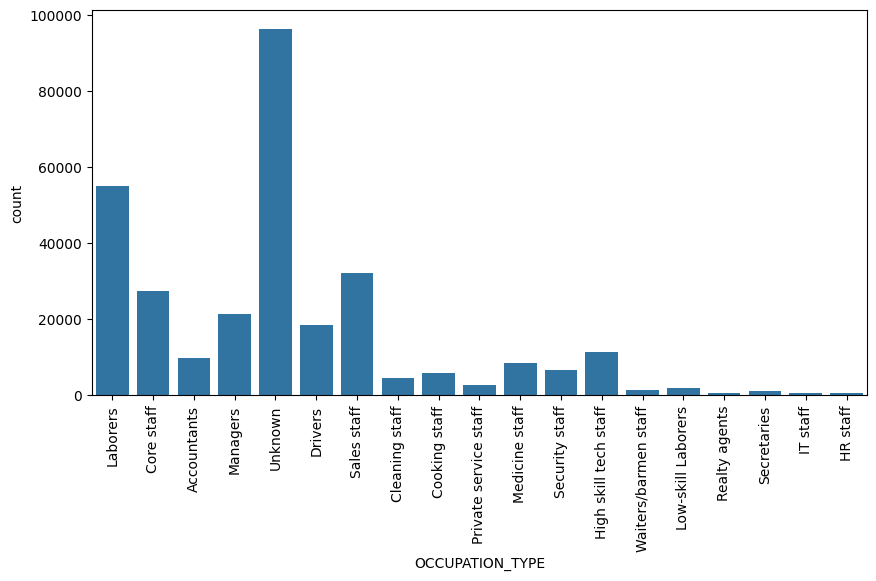

In [50]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "OCCUPATION_TYPE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
- Якщо поглянути на графік, то найбільшу кількість заявників на кредит мають `Laborers`
- Для імпутації краще залишити дані як є (пропущені значення становлять 31,35%) і не проводити імпутацію за якоюсь константою, як-от мода або мін/макс медіана, якщо це числовий стовпчик, оскільки це може викривити дані в подальших розрахунках.

Існує також можливість імпутації за допомогою більш "розумних" методів, але ми вивчимо їх пізніше, а зараз ми робимо те, що можемо, за допомогою деяких найпростіших перетворень.

### Аналіз стовпця `EXT_SOURCE_3`

- пропущені значення = 19.83%

In [51]:
df.EXT_SOURCE_3.value_counts().head()

,count
EXT_SOURCE_3,
0.75,1460
0.71,1315
0.69,1276
0.67,1191
0.65,1154


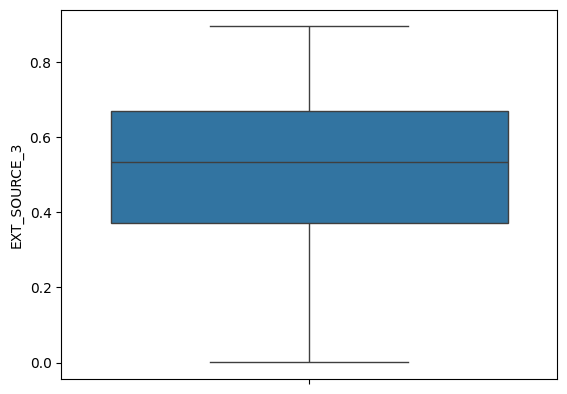

In [52]:
sns.boxplot(df.EXT_SOURCE_3)
plt.show()

Отримання процентильних значень для `EXT_SOURCE_3`

In [53]:
df.EXT_SOURCE_3.quantile(q = [0.25,0.5,0.75,1])

,EXT_SOURCE_3
0.25,0.37
0.50,0.54
0.75,0.67
1.00,0.90


Найбільш повторюване значення в `EXT_SOURCE_3

In [54]:
df.EXT_SOURCE_3.mode()[0]

np.float64(0.746300213050371)

Перевірка середнього значення `EXT_SOURCE_3`

In [55]:
df.EXT_SOURCE_3.mean()

np.float64(0.5108529061799658)

**Спостереження**
-  Дивлячись на діагараму розмаху, медіана становить 0,535276
-  Найчастіше повторюване значення - 0,74630
-  Середнє значення - 0,51085
-  Хоча середнє та медіана є ближчими і можуть бути використані для імпутації, оскільки відсутнє відсоткове значення є більшим (19,83%), краще залишити дані як є і не проводити імпутації. Якщо метод вимагає імпутації, ми можемо імпутувати дані за допомогою медіани і створити ще один стовпчик, в якому буде позначено, які значення були імпутовані.

# ДЗ 1. Аналіз стовпців `AMT_REQ_CREDIT_BUREAU` з пропущеними значеннями

Виведіть середнє, моду, медіану та відсоток відсутніх даних для настуних колонок:

- `AMT_REQ_CREDIT_BUREAU_YEAR`
-	`AMT_REQ_CREDIT_BUREAU_MON`
-	`AMT_REQ_CREDIT_BUREAU_WEEK`

На основі виведених даних напишіть висновок про те, чи варто заповнювати пусті значення і якщо так, то яким чином?

In [56]:
filtered_cols = ['AMT_REQ_CREDIT_BUREAU_YEAR','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_WEEK']

In [57]:
null_df[null_df['column_name'].isin(filtered_cols)]

,column_name,null_count,null_percentage
118,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.50
119,AMT_REQ_CREDIT_BUREAU_MON,41519,13.50
121,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.50


In [58]:

df.AMT_REQ_CREDIT_BUREAU_MON.mode()

,AMT_REQ_CREDIT_BUREAU_MON
0,0.00


In [59]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

,AMT_REQ_CREDIT_BUREAU_WEEK
0,0.00


In [60]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.00


In [61]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

,AMT_REQ_CREDIT_BUREAU_YEAR
count,265992.00
mean,1.90
std,1.87
min,0.00
25%,0.00
50%,1.00
75%,3.00
max,25.00


In [62]:
df.AMT_REQ_CREDIT_BUREAU_MON.describe()

,AMT_REQ_CREDIT_BUREAU_MON
count,265992.00
mean,0.27
std,0.92
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,27.00


In [63]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

,AMT_REQ_CREDIT_BUREAU_WEEK
count,265992.00
mean,0.03
std,0.20
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,8.00


# Висновок:
Для всіх стовпців однаковий процент пропущених значень:13,5%, отже можна розглядати варіант заповнення пропущених значень медіано або модою.
1. AMT_REQ_CREDIT_BUREAU_YEAR - не бачу чітко вираженої центральної тенденції, не заповнювала б таким методом.
Мода: 0
Медіана: 1
Середнє: 1,9
2. AMT_REQ_CREDIT_BUREAU_MON - мода та медіана мають однакове значення, можемо використати їх для імпутації  пропущених значень. Додати додаткову колонку flag, для позначення імпутованих значень.
Мода: 0
Медіана: 0
Середнє: 0,27
3. AMT_REQ_CREDIT_BUREAU_WEEK - аналогічно до аналізу вище AMT_REQ_CREDIT_BUREAU_MON
Мода: 0
Медіана: 0
Середнє: 0,03




## Перевірка стовпців зі значеннями NULL > 0% та < 1%

Створення датафрейму `null_df_under1` з відсотком пропущених значень > 0% та < 1% у кожному стовпці

In [64]:
null_df_under1 = null_df[(null_df['null_percentage'] > 0) & (null_df['null_percentage'] < 1)]

In [65]:
null_df_under1.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
11,NAME_TYPE_SUITE,1292,0.42
92,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
93,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
94,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
42,EXT_SOURCE_2,660,0.21
10,AMT_GOODS_PRICE,278,0.09


### Аналіз стовпця `NAME_TYPE_SUITE`

In [66]:
null_df_under1[null_df_under1.column_name == 'NAME_TYPE_SUITE']

,column_name,null_count,null_percentage
11,NAME_TYPE_SUITE,1292,0.42


In [67]:
df['NAME_TYPE_SUITE'].value_counts()

,count
NAME_TYPE_SUITE,
Unaccompanied,248526
Family,40149
"Spouse, partner",11370
Children,3267
Other_B,1770
Other_A,866
Group of people,271


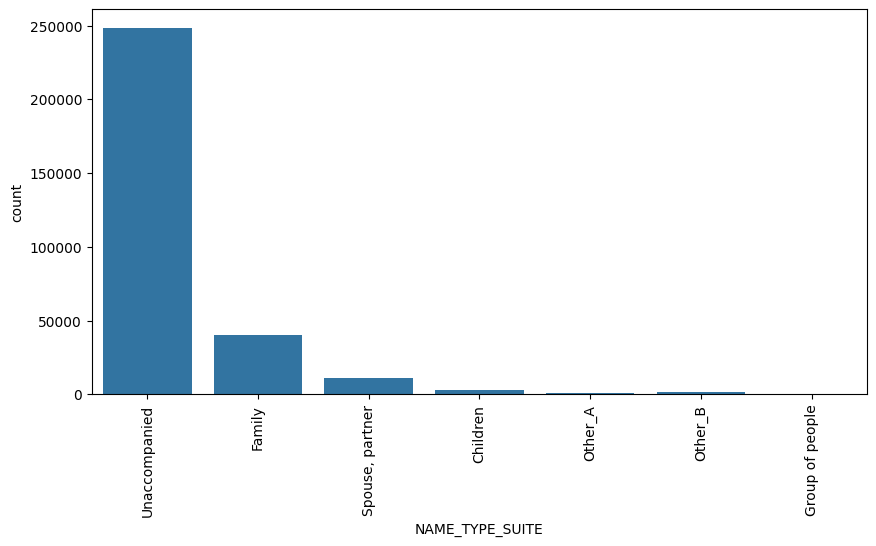

In [68]:
plt.figure(figsize = (10,5))
sns.countplot(data = df, x = "NAME_TYPE_SUITE")
plt.xticks(rotation = 90)
plt.show()

**Спостереження**
-   Дивлячись на графік, категорія `Unaccompanied` має найбільшу кількість заявників на отримання кредиту. Отже, більшість позичальників наважуються звертатися за кредитом без супроводу.
- Ми можемо продовжити імпутацію `Unaccompanied` в датафреймі, але краше надати перевагу другому варіанту.
- Ми також могли б імпутувати дані зі значенням `NA`, оскільки ця колонка є категоричною.
- Аналогічно, якщо в колонці не вистачає менше 1% даних, ми можемо її опустити. Але якщо ми вилучимо всі дані в усіх стовпчиках, де пропущено <=1% даних, ми можемо вилучити занадто багато даних. Тому я здебільшого зберігаю дані настільки, наскільки це можливо.

In [69]:
df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)

<ipython-input-69-9eba76e3e9b9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna('NA', inplace=True)


### Аналіз стовпця `OBS_30_CNT_SOCIAL_CIRCLE`

In [70]:
null_df_under1[null_df_under1.column_name == 'OBS_30_CNT_SOCIAL_CIRCLE']

,column_name,null_count,null_percentage
91,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33


In [71]:
df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts().head(10)

,count
OBS_30_CNT_SOCIAL_CIRCLE,
0.00,163910
1.00,48783
2.00,29808
3.00,20322
4.00,14143
5.00,9553
6.00,6453
7.00,4390
8.00,2967


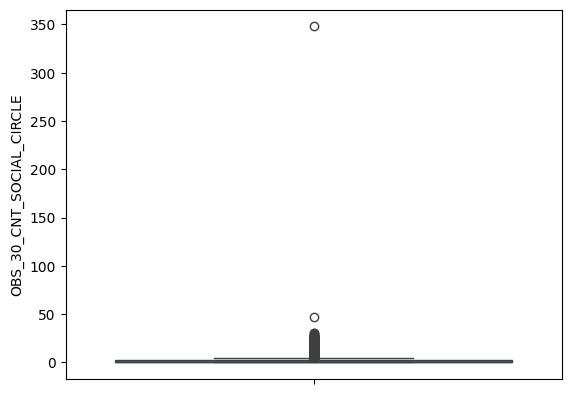

In [72]:
sns.boxplot(df.OBS_30_CNT_SOCIAL_CIRCLE)
plt.show()

Розрахунок перцентилів `OBS_30_CNT_SOCIAL_CIRCLE`

In [73]:
df.OBS_30_CNT_SOCIAL_CIRCLE.quantile(q = [0.25,0.5,0.75,1])

,OBS_30_CNT_SOCIAL_CIRCLE
0.25,0.00
0.50,0.00
0.75,2.00
1.00,348.00


Найбільш повторюване значення в `OBS_30_CNT_SOCIAL_CIRCLE`

In [74]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mode()[0]

np.float64(0.0)

Середнє значення `OBS_30_CNT_SOCIAL_CIRCLE`

In [75]:
df.OBS_30_CNT_SOCIAL_CIRCLE.mean()

np.float64(1.4222454239942575)

**Спостереження**
- Дивлячись на діаграму розмаху, медіана дорівнює 0.0
- Найчастіше повторюване значення - 0.0
- Середнє значення - 1,4222
- Є два викидні значення на рівні 50 та 350.
- Медіана і мода близькі (з огляду на діапазон даних у цьому стовпчику) і можуть бути використані для імпутації. Це не призведе до зміщення, оскільки відсоток пропущених значень невеликий (0,33%)

In [76]:
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)

<ipython-input-76-2ec5564a2152>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace=True)


# ДЗ 2. Аналіз і заповнення пустих значень у колонках з малим відсотком пропущених

За прикладом вище проведіть аналіз пропущених значень в колонках
- EXT_SOURCE_2
- AMT_GOODS_PRICE

Для швидшого аналізу рекомендую написати фукнцію, яку Ви зможете викликати для кожної з колонок.

Зробіть висновок, що робити з пропущеними значеннями в кожному випадку і виконанайте ту дію, яку зазначили.

In [77]:
def analiz(column):
  print(null_df_under1[null_df_under1.column_name == column])
  #print(df[column].describe())
  print(df[column].value_counts(15))
  print("Mode: ", df[column].mode()[0])
  print("Median: ", df[column].median())
  print("Mean: ", df[column].mean())
  print(df[column].quantile(q = [0.25,0.5,0.75,1]))
  sns.boxplot(df[column])
  plt.show()



     column_name  null_count  null_percentage
42  EXT_SOURCE_2         660             0.21
EXT_SOURCE_2
0.29   0.00
0.26   0.00
0.27   0.00
0.16   0.00
0.27   0.00
       ... 
0.35   0.00
0.20   0.00
0.15   0.00
0.29   0.00
0.27   0.00
Name: proportion, Length: 119831, dtype: float64
Mode:  0.2858978721410488
Median:  0.5659614260608526
Mean:  0.5143926741308462
0.25   0.39
0.50   0.57
0.75   0.66
1.00   0.85
Name: EXT_SOURCE_2, dtype: float64


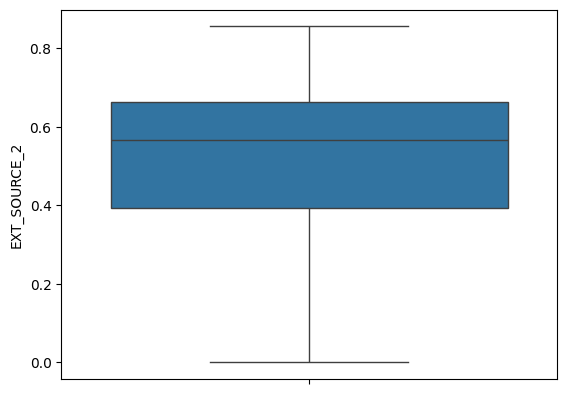

In [78]:
analiz('EXT_SOURCE_2')

        column_name  null_count  null_percentage
10  AMT_GOODS_PRICE         278             0.09
AMT_GOODS_PRICE
450000.00   0.08
225000.00   0.08
675000.00   0.08
900000.00   0.05
270000.00   0.04
            ... 
436801.50   0.00
668506.50   0.00
584820.00   0.00
367879.50   0.00
448546.50   0.00
Name: proportion, Length: 1002, dtype: float64
Mode:  450000.0
Median:  450000.0
Mean:  538396.2074288895
0.25    238500.00
0.50    450000.00
0.75    679500.00
1.00   4050000.00
Name: AMT_GOODS_PRICE, dtype: float64


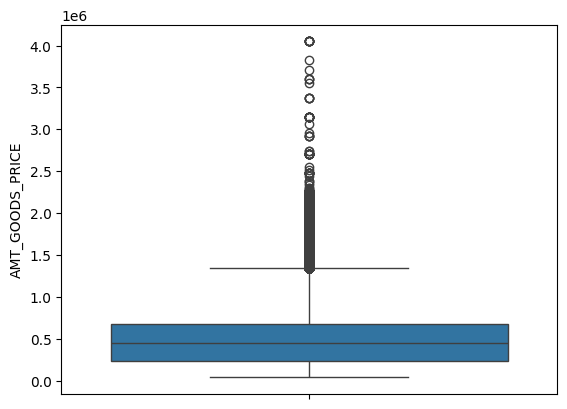

In [79]:
analiz('AMT_GOODS_PRICE')

Висновок:
1. EXT_SOURCE_2
- невеликий відсоток пропущених значень 0,21%
- з графіка бачимо що дані розподіленні більш-менш рівномірно,
- значення колонки недискретні
- для заповнення можемо використати медіану, так як значення недискретні.

2. AMT_GOODS_PRICE
- невеликий відсоток пропущених значень 0,09%
- з графіка видно ща значення розподілені нерівномірно, є багато викидів.
- мода та медіана збігаються, можна імпутувати значення саме з їх допомогою. Так як відсоток пропущених значень невеликий, зміщення не передбачається, але я б ще раз перевірила для цікавості на графіку.

In [80]:
pd.set_option('future.no_silent_downcasting', True)

In [81]:
df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna( df['AMT_GOODS_PRICE'].median())

In [82]:
df['EXT_SOURCE_2'] = df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].median())

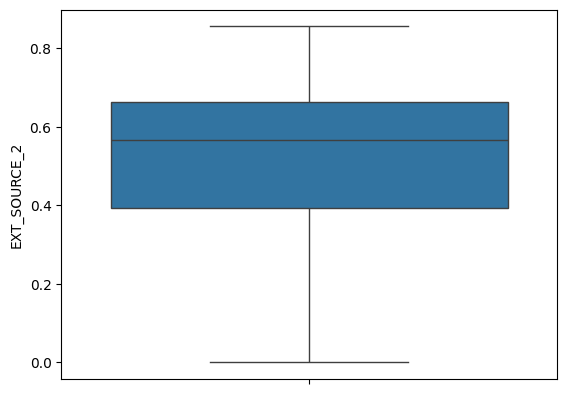

In [83]:
sns.boxplot(df['EXT_SOURCE_2'])
plt.show()

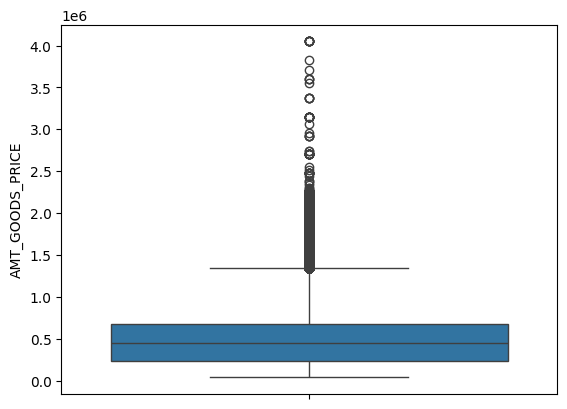

In [84]:
sns.boxplot(df['AMT_GOODS_PRICE'])
plt.show()

# Робота з неправильними/невідомими значеннями даних

### Аналіз стовпця `CODE_GENDER`

Перевірка діапазону значень

In [85]:
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202448
M,105059
XNA,4


Стать має бути тільки чоловіча або жіноча. Значення `XNA` може вказувати на те, що значення не було надано заявником або пропущено кредитним спеціалістом, який перевіряє заявку

In [86]:
df[df['CODE_GENDER'] == 'XNA']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
35657,141289,0,Revolving loans,XNA,1,1,0,207000.00,382500.00,19125.00,337500.00,Unaccompanied,Working,Secondary / secondary special,Married,Municipal apartment,0.02,-20232,-10044,-10024.00,-3537,1,1,1,1,1,0,Unknown,2.00,3,3,TUESDAY,10,0,0,0,0,0,0,Business Entity Type 1,0.30,0.46,0.00,0.00,0.00,0.00,-286.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
38566,144669,0,Revolving loans,XNA,0,1,2,157500.00,270000.00,13500.00,225000.00,Family,Working,Secondary / secondary special,Married,House / apartment,0.03,-13717,-2797,-2241.00,-4659,1,1,1,1,1,0,Low-skill Laborers,4.00,2,2,FRIDAY,16,0,0,0,0,0,0,Industry: type 3,0.71,0.31,0.00,0.00,0.00,0.00,-493.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,3.00,0.00,4.00
83382,196708,0,Revolving loans,XNA,0,1,1,135000.00,405000.00,20250.00,225000.00,Unaccompanied,Working,Higher education,Married,House / apartment,0.04,-10647,-1228,-183.00,-1671,1,1,1,1,1,0,Core staff,3.00,2,2,THURSDAY,15,0,0,0,0,0,0,Kindergarten,0.66,0.08,7.00,1.00,7.00,1.00,-851.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,3.00
189640,319880,0,Revolving loans,XNA,1,1,0,247500.00,540000.00,27000.00,900000.00,Unaccompanied,Commercial associate,Incomplete higher,Civil marriage,House / apartment,0.04,-9649,-2293,-4099.00,-2326,1,1,1,1,1,0,Unknown,2.00,2,2,FRIDAY,15,0,0,0,0,0,0,Medicine,0.66,0.36,10.00,4.00,10.00,4.00,-1681.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,1.00,6.00


Оскільки дані виглядають достовірними, ми перевіримо можливість застосування методу імпутації.
- Заявників-жінок удвічі більше, ніж заявників-чоловіків
- Отже, ми прирівняємо `CODE_GENDER` до 'F'

In [87]:
df['CODE_GENDER'] = df['CODE_GENDER'].apply(lambda x: 'F' if x == 'XNA' else x)

Перевірка, чи вилучено `XNA`

In [88]:
df['CODE_GENDER'].value_counts()

,count
CODE_GENDER,
F,202452
M,105059


### Аналіз стовпця `DAYS_BIRTH`

In [89]:
df['DAYS_BIRTH'].value_counts().head()

,count
DAYS_BIRTH,
-13749,43
-13481,42
-10020,41
-18248,41
-15771,40


Існує ~17K+ унікальних записів, всі з яких, схоже, мають від'ємні значення

In [90]:
df['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061])

In [91]:
df['DAYS_BIRTH'].nunique()

17460

In [92]:
df['DAYS_BIRTH'].describe()

,DAYS_BIRTH
count,307511.00
mean,-16037.00
std,4363.99
min,-25229.00
25%,-19682.00
50%,-15750.00
75%,-12413.00
max,-7489.00


Перетворення `Days Birth` на додатні дні

In [93]:
df['DAYS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: -x if x < 0 else x)

In [94]:
df['DAYS_BIRTH'].value_counts()

,count
DAYS_BIRTH,
13749,43
13481,42
10020,41
18248,41
15771,40
...,...
24958,1
25048,1
24980,1


Всі дні в `DAYS_BIRTH` мають додатні значення - це може бути зручніше для аналізу.

#### Створимо нову колонку `YEARS_BIRTH` для зручності аналізу

In [95]:
df['YEARS_BIRTH'] = df['DAYS_BIRTH'].apply(lambda x: round(x/365))

### Аналіз стовпця `NAME_FAMILY_STATUS`

Перевірка діапазону значень

In [96]:
df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196432
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088
Unknown,2


Стать має бути тільки чоловіча або жіноча. Значення `Unknown` може означати, що значення не було вказане заявником або пропущене кредитним спеціалістом, який перевіряє заявку

In [97]:
df[df['NAME_FAMILY_STATUS'] == 'Unknown']

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH
41982,148605,0,Revolving loans,M,0,1,0,450000.00,675000.00,33750.00,450000.00,NA,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.02,12396,-1161,-3265.00,-4489,1,1,1,1,1,0,Managers,NaN,2,2,THURSDAY,15,0,1,1,0,1,1,Insurance,0.70,NaN,3.00,0.00,3.00,0.00,-876.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,34
187348,317181,0,Revolving loans,F,0,1,0,202500.00,585000.00,29250.00,450000.00,NA,Commercial associate,Higher education,Unknown,House / apartment,0.03,12844,-232,-1597.00,-1571,1,1,0,1,0,0,Accountants,NaN,2,2,FRIDAY,14,0,0,0,0,0,0,Business Entity Type 2,0.65,0.67,1.00,0.00,1.00,0.00,-654.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00,35


In [98]:
df['NAME_FAMILY_STATUS'].value_counts(normalize = True) * 100

,proportion
NAME_FAMILY_STATUS,
Married,63.88
Single / not married,14.78
Civil marriage,9.68
Separated,6.43
Widow,5.23
Unknown,0.00


Оскільки дані виглядають достовірними, ми продовжимо перевірку методу імпутації.
- Одружені заявники складають понад 63% заявників.
- Отже, ми прирівняємо `NAME_FAMILY_STATUS` до `Married`.

In [99]:
df['NAME_FAMILY_STATUS'] = df['NAME_FAMILY_STATUS'].apply(lambda x: 'Married' if x == 'Unknown' else x)

Перевірка чи вилучено `Unknown`

In [100]:
df['NAME_FAMILY_STATUS'].value_counts()

,count
NAME_FAMILY_STATUS,
Married,196434
Single / not married,45444
Civil marriage,29775
Separated,19770
Widow,16088


### Аналіз стовпця`DAYS_EMPLOYED`

In [221]:
df['DAYS_EMPLOYED'].value_counts().head()

,count
DAYS_EMPLOYED,
365243,55374
200,156
224,152
230,151
199,151


In [210]:
df['DAYS_EMPLOYED'].value_counts(normalize = True) * 100

,proportion
DAYS_EMPLOYED,
365243,18.01
200,0.05
224,0.05
230,0.05
199,0.05
...,...
11471,0.00
12878,0.00
10573,0.00


In [103]:
len(df[df['DAYS_EMPLOYED'] < 365243])

252137

In [104]:
df[df['DAYS_EMPLOYED'] < 365243].DAYS_EMPLOYED.value_counts()

,count
DAYS_EMPLOYED,
-200,156
-224,152
-230,151
-199,151
-212,150
...,...
-12037,1
-16554,1
-11276,1


In [105]:
df['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694])

In [106]:
df['DAYS_EMPLOYED'].nunique()

12574

**Спостереження**
- Існує ~55K+ записів, для яких `DAYS_EMPLOYED` дорівнює 365243 дням
- Решта 252K+ записів мають від'ємне значення днів
- Існує 12 574 унікальних значень для `DAYS_EMPLOYED`

 - Колонка `DAYS_EMPLOYED` вказує на те, за скільки днів до подачі заявки особа почала поточну роботу, заявник/кредитний спеціаліст повинен ввести від'ємні значення, щоб вказати дні, що передують даті подачі заявки.<br>
 - Ми конвертуємо від'ємні значення в `DAYS_EMPLOYED` в додатні дні, щоб стандартизувати дні під час використання в розрахунках

In [107]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: -x if x < 0 else x)

In [108]:
df['DAYS_EMPLOYED'].value_counts().head()

,count
DAYS_EMPLOYED,
365243,55374
200,156
224,152
230,151
199,151


Ми бачимо, що всі дні в `DAYS_EMPLOYED` мають додатні значення

**Для ~55K+ записів, для яких `DAYS_EMPLOYED` становить 365243 дні**
- Конвертуючи це в роки, ми отримуємо 1000 років, які фізично неможливо використати для працевлаштування заявника
- Це відповідає 18% даних і не може бути аномалією
- Вони можуть бути або пенсіонерами, або безробітними, і, дивлячись на дані, наш висновок є правильним

> Є два способи впоратися з цим
>> 1) Ми залишаємо дані такими, якими вони є, і враховуємо це під час аналізу АБО  <br>
>> 2) Ми розраховуємо середню кількість днів зайнятості без урахування цієї категорії та вписуємо її замість 365243 днів для пенсіонерів. <br>
>> Для безробітних кількість днів зайнятості може дорівнювати 0

*Примітка*
 - Під час розрахунків у цьому стовпчику ми повинні враховувати цей сценарій, оскільки інакше він спотворює наші результати

In [109]:
df[df['DAYS_EMPLOYED'] == 365243].NAME_INCOME_TYPE.value_counts()

,count
NAME_INCOME_TYPE,
Pensioner,55352
Unemployed,22


#### Створимо нову колонку `YEARS_EMPLOYED` для зручності аналізу

In [110]:
df['YEARS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_REGISTRATION`

In [111]:
df['DAYS_REGISTRATION'].value_counts().head()

,count
DAYS_REGISTRATION,
-1.00,113
-7.00,98
-6.00,96
-4.00,92
-2.00,92


In [112]:
df['DAYS_REGISTRATION'].value_counts(normalize = True).head()

,proportion
DAYS_REGISTRATION,
-1.00,0.00
-7.00,0.00
-6.00,0.00
-4.00,0.00
-2.00,0.00


In [113]:
df['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [114]:
df['DAYS_REGISTRATION'].nunique()

15688

Перетворення `DAYS_REGISTRATION` в додатні дні

In [115]:
df['DAYS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: -x if x < 0 else x)

In [116]:
df['DAYS_REGISTRATION'].value_counts().head()

,count
DAYS_REGISTRATION,
1.00,113
7.00,98
6.00,96
4.00,92
2.00,92


Всі дні в `DAYS_REGISTRATION` мають додатні значення

#### Створимо нову колонку `YEARS_REGISTRATION` для зручності аналізу

In [117]:
df['YEARS_REGISTRATION'] = df['DAYS_REGISTRATION'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_ID_PUBLISH`

In [118]:
df['DAYS_ID_PUBLISH'].value_counts().head()

,count
DAYS_ID_PUBLISH,
-4053,169
-4095,162
-4046,161
-4417,159
-4256,158


In [119]:
df['DAYS_ID_PUBLISH'].value_counts(normalize = True).head()

,proportion
DAYS_ID_PUBLISH,
-4053,0.00
-4095,0.00
-4046,0.00
-4417,0.00
-4256,0.00


In [120]:
df['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211])

In [121]:
df['DAYS_ID_PUBLISH'].nunique()

6168

Перетворення `DAYS_ID_PUBLISH` в додатні дні

In [122]:
df['DAYS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: -x if x < 0 else x)

In [123]:
df['DAYS_ID_PUBLISH'].value_counts().head()

,count
DAYS_ID_PUBLISH,
4053,169
4095,162
4046,161
4417,159
4256,158


Всі дні в `DAYS_ID_PUBLISH` мають додатні значення

#### Створимо нову колонку `YEARS_ID_PUBLISH` для зручності аналізу

In [124]:
df['YEARS_ID_PUBLISH'] = df['DAYS_ID_PUBLISH'].apply(lambda x: round(x/365))

### Аналіз стовпця `DAYS_LAST_PHONE_CHANGE`

In [125]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

,count
DAYS_LAST_PHONE_CHANGE,
0.00,37672
-1.00,2812
-2.00,2318
-3.00,1763
-4.00,1285


In [126]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts(normalize = True).head()

,proportion
DAYS_LAST_PHONE_CHANGE,
0.00,0.12
-1.00,0.01
-2.00,0.01
-3.00,0.01
-4.00,0.00


In [127]:
df['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [128]:
df['DAYS_LAST_PHONE_CHANGE'].nunique()

3773

Перетворення `DAYS_LAST_PHONE_CHANGE` в додатні дні

In [129]:
df['DAYS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: -x if x < 0 else x)

In [130]:
df['DAYS_LAST_PHONE_CHANGE'].value_counts().head()

,count
DAYS_LAST_PHONE_CHANGE,
0.00,37672
1.00,2812
2.00,2318
3.00,1763
4.00,1285


Всі дні в `DAYS_LAST_PHONE_CHANGE` мають додатні значення

#### Створення нової колонки `YEARS_LAST_PHONE_CHANGE` для зручності аналізу

In [131]:
df['YEARS_LAST_PHONE_CHANGE'] = df['DAYS_LAST_PHONE_CHANGE'].apply(lambda x: round(x/365,0))

# Автоматичні функції

### Створення функції `age_cat` для категоризації `YEARS_BORNING`

In [132]:
def age_cat(years):
    if years <= 20:
        return '0-20'
    elif years > 20 and years <= 30:
        return '20-30'
    elif years > 30 and years <= 40:
        return '30-40'
    elif years > 40 and years <= 50:
        return '40-50'
    elif years > 50 and years <= 60:
        return '50-60'
    elif years > 60 and years <= 70:
        return '60-70'
    elif years > 70:
        return '70+'

### Одномірний (категоріальний vs цільовий) та двомірний (категоріальний vs категоріальний) аналіз (гістограма) - категоріальні стовпчики

In [133]:
import matplotlib.pyplot as plt


def bi_cat_countplot(df, column, hue_column):
    unique_hue_values = df[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,6)

    pltname = f'Нормалізований розподіл значень за категорією: {column}'
    proportions = df.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
        ax.bar_label(container, fmt='{:,.1f}%')

    pltname = f'Кількість даних за категорією: {column}'
    counts = df.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
        by=unique_hue_values[0], ascending=False
        ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container)


def uni_cat_target_compare(df, column):
    bi_cat_countplot(df, column, hue_column='TARGET' )


def bi_countplot_target(df0, df1, column, hue_column):
  pltname = 'Клієнт зі складнощами щодо платності'
  print(pltname.upper())
  bi_cat_countplot(df1, column, hue_column)
  plt.show()

  pltname = 'Клієнти зі своєчасними платежами'
  print(pltname.upper())
  bi_cat_countplot(df0, column, hue_column)
  plt.show()


### Обчислення мінімального та максимального діапазону відхилень для числових стовпців

In [134]:
def outlier_range(dataset,column):
    Q1 = dataset[column].quantile(0.25)
    Q3 = dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = (Q1 - 1.5 * IQR)
    Max_value = (Q3 + 1.5 * IQR)
    return Max_value

# Робота з викидами для числових стовпців

In [135]:
import warnings

def dist_box(dataset, column):
    with warnings.catch_warnings():
      warnings.simplefilter("ignore")

      plt.figure(figsize=(16,6))

      plt.subplot(1,2,1)
      sns.distplot(dataset[column], color = 'purple')
      pltname = 'Графік розподілу для ' + column
      plt.ticklabel_format(style='plain', axis='x')
      plt.title(pltname)

      plt.subplot(1,2,2)
      red_diamond = dict(markerfacecolor='r', marker='D')
      sns.boxplot(y = column, data = dataset, flierprops = red_diamond)
      pltname = 'Боксплот для ' + column
      plt.title(pltname)

      plt.show()

### Аналіз стовпця`CNT_CHILDREN`

In [136]:
df['CNT_CHILDREN'].value_counts().sort_values(ascending = False).head()

,count
CNT_CHILDREN,
0,215371
1,61119
2,26749
3,3717
4,429


In [137]:
(df['CNT_CHILDREN'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
CNT_CHILDREN,
0,70.04
1,19.88
2,8.70
3,1.21
4,0.14


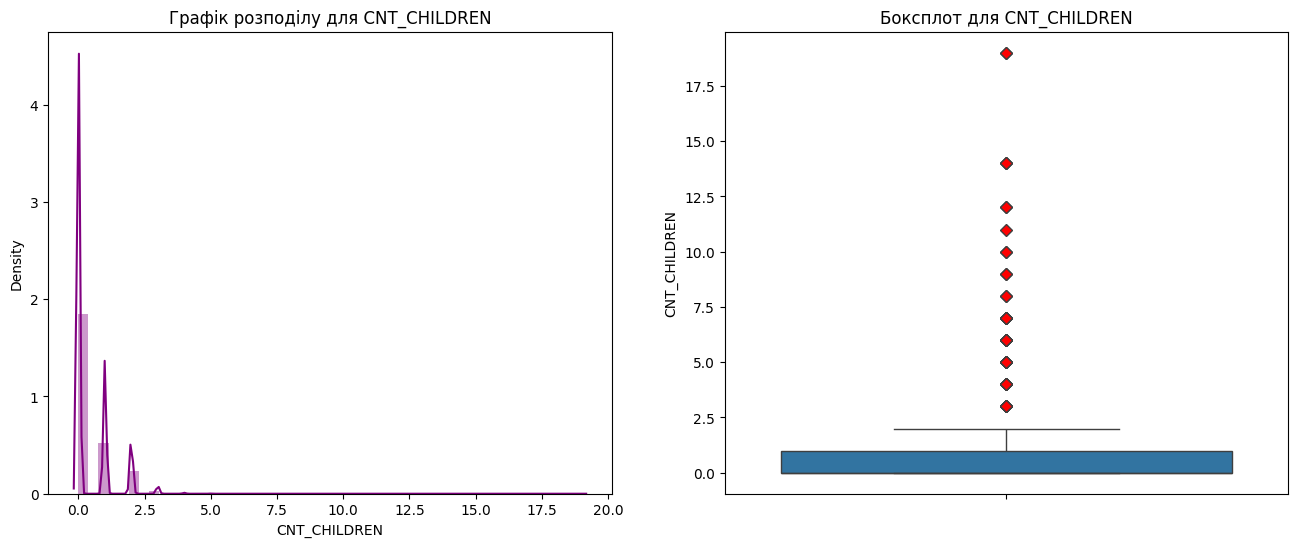

In [138]:
dist_box(df,'CNT_CHILDREN')

Розрахуємо IQR (Inter Quartile range)

In [139]:
Q1 = df['CNT_CHILDREN'].quantile(0.25)
Q3 = df['CNT_CHILDREN'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


Значення *до* (Q1 - 1,5 * IQR) та *після* (Q3 + 1,5 * IQR) є викидами

In [140]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: -1.5
Максимальне значення, після якого існують викиди: 2.5


**Спостереження**
- Дивлячись на дані, ми бачимо, що кількість заявників, які мають більше 7 дітей, є дуже мінімальною (2 або 3 в кожній категорії)
- Крім того, дивлячись на дані для заявників з 10 дітьми, заявники мають лише 31 й 41 рік відповідно. Це виглядає як одиничний випадок й може розглядатися як відхилення від норми
- Як дистрибутивні, так і діаграми розмаху чітко показують, що значення, які перевищують значення 2.5, є відхиленнями від норми.

**Висновок**
- Заявники, які мають 3 або більше дітей, є випадками, що відхиляються від норми. Ми можемо надати спеціальний аналіз для цих випадків.

### Аналіз стовпця `AMT_INCOME_TOTAL`

In [141]:
df['AMT_INCOME_TOTAL'].value_counts().sort_values(ascending = False).head()

,count
AMT_INCOME_TOTAL,
135000.00,35750
112500.00,31019
157500.00,26556
180000.00,24719
90000.00,22483


In [142]:
(df['AMT_INCOME_TOTAL'].value_counts(normalize = True).sort_values(ascending = False) * 100).head(20)

,proportion
AMT_INCOME_TOTAL,
135000.00,11.63
112500.00,10.09
157500.00,8.64
180000.00,8.04
90000.00,7.31
225000.00,6.73
202500.00,5.31
67500.00,3.62
270000.00,3.52


In [143]:
df['AMT_INCOME_TOTAL'].describe(percentiles = [0.75,0.99,0.999])

,AMT_INCOME_TOTAL
count,307511.00
mean,168797.92
std,237123.15
min,25650.00
50%,147150.00
75%,202500.00
99%,472500.00
99.9%,900000.00
max,117000000.00


Побудуємо графік для `AMT_INCOME_TOTAL`

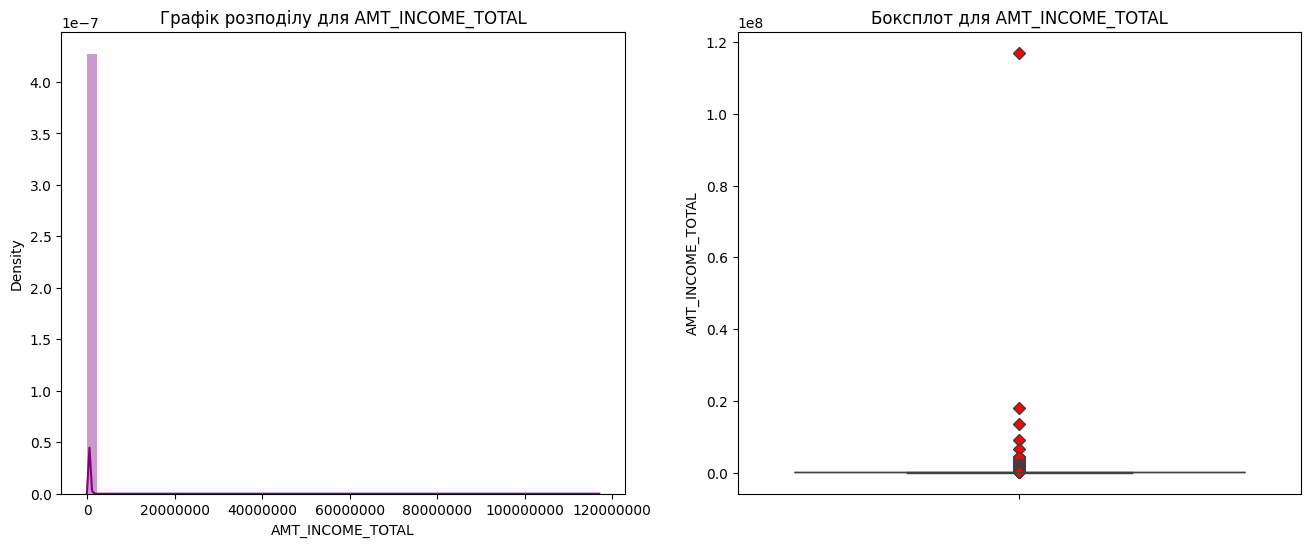

In [144]:
dist_box(df,'AMT_INCOME_TOTAL')

- Графіки кінцевого результату дуже тонкі, й ми можемо спостерігати викид близько ~120 мільйонів.
- Давайте побудуємо графік, розглядаючи лише дохід нижче 99,9% значення, тобто 900 тисяч.

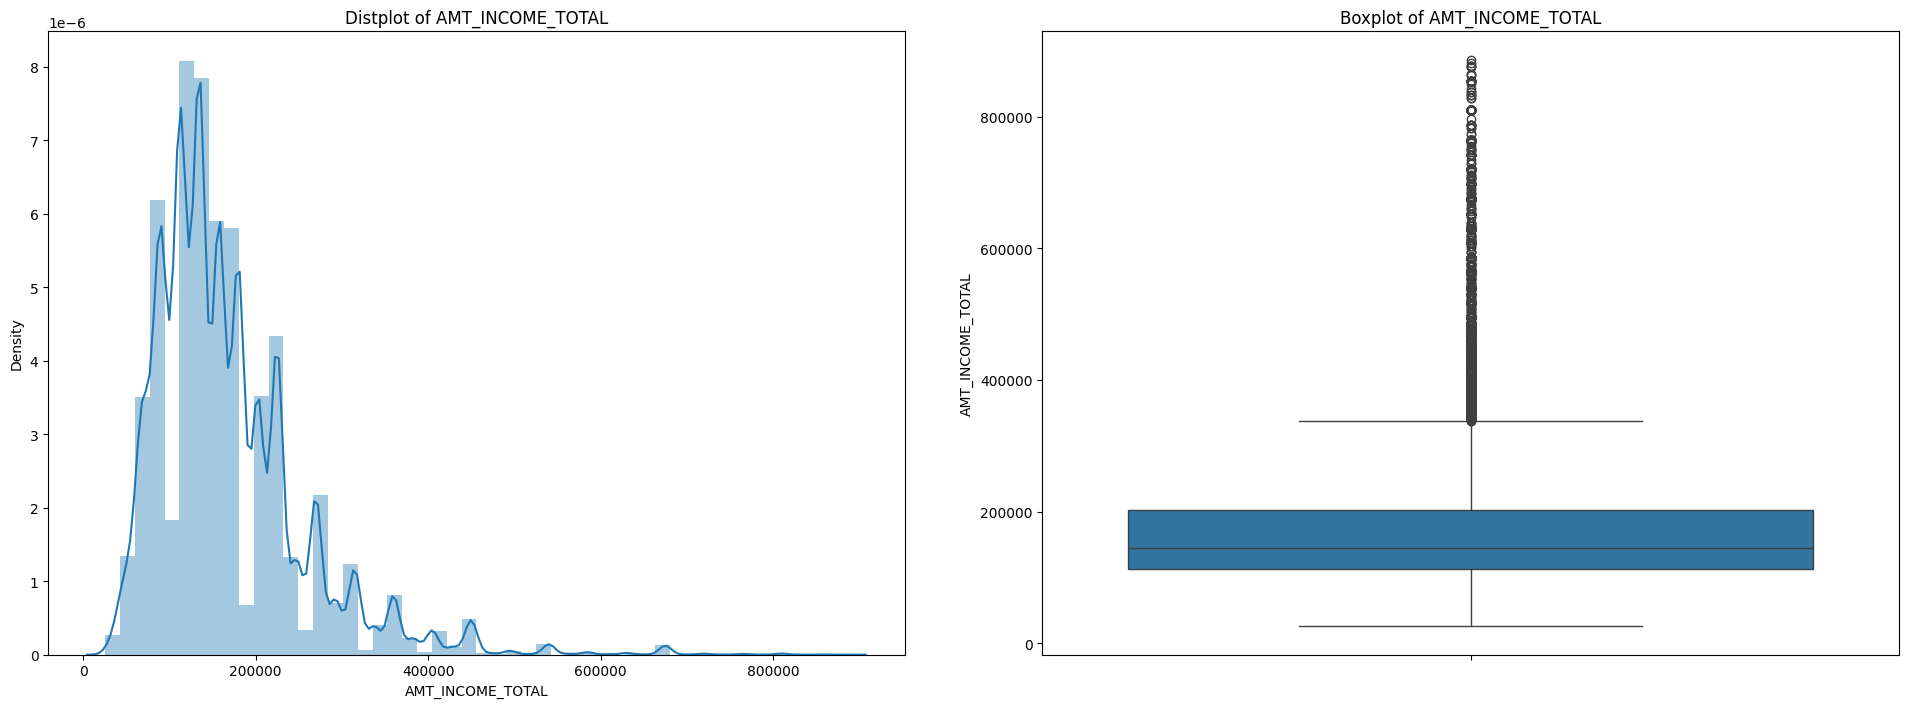

In [145]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Distplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_INCOME_TOTAL'] < 900000].AMT_INCOME_TOTAL)
    pltname = 'Boxplot of ' + 'AMT_INCOME_TOTAL'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Тепер ми можемо чітко побачити розподіл і діапазон даних на обох графіках.
 - Це означає, що значення понад 900 тис. грн доходу явно є викидами

In [146]:
df[df['AMT_INCOME_TOTAL'] > 900000].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1504,101769,0,Revolving loans,M,1,1,0,1080000.00,180000.00,9000.00,180000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.07,13633,5536,3.00,4971,1,1,0,1,0,0,Unknown,2.00,1,1,FRIDAY,13,0,1,1,0,0,0,Business Entity Type 3,0.65,0.46,0.00,0.00,0.00,0.00,491.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,37,15,0,14,1.00
1723,102015,0,Cash loans,F,0,1,0,1935000.00,269550.00,10534.50,225000.00,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.01,18636,365243,3401.00,2168,1,0,0,1,1,0,Unknown,2.00,2,2,MONDAY,11,0,0,0,0,0,0,XNA,0.27,0.33,1.00,0.00,1.00,0.00,381.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,51,1001,9,6,1.00
3371,103938,0,Cash loans,F,0,0,1,1350000.00,2410380.00,109053.00,2250000.00,NA,Commercial associate,Higher education,Married,House / apartment,0.07,12213,843,757.00,4132,1,1,0,1,1,0,Managers,3.00,1,1,SUNDAY,13,0,1,1,0,0,0,Housing,0.72,0.57,0.00,0.00,0.00,0.00,2.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.00,0.00,0.00,3.00,0.00,0.00,33,2,2,11,0.00
4603,105384,0,Revolving loans,F,1,1,0,1350000.00,405000.00,20250.00,405000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.02,14781,4768,3469.00,4045,1,1,0,1,0,0,Managers,2.00,2,2,TUESDAY,12,0,0,0,0,0,0,Business Entity Type 3,0.66,0.73,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,40,13,10,11,0.00
5673,106637,0,Cash loans,M,1,1,3,967500.00,450000.00,30073.50,450000.00,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.05,11901,546,2932.00,215,1,1,0,1,0,0,Managers,5.00,1,1,MONDAY,14,0,0,0,1,1,0,Business Entity Type 3,0.49,0.45,0.00,0.00,0.00,0.00,88.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,1.00,1.00,0.00,33,1,8,1,0.00


**Спостереження**
- Дивлячись на дані, ми бачимо, що дохід понад 900 тис. грн (99,9% значення) є викидом
- Як діаграма розподілу, так і діаграма розмаху чітко показують нам ту саму тенденцію

**Висновок**
- Апліканти з доходом понад 900 тис. грн (99,9% значення) є викидами

# ДЗ 3. Аналіз викидів

Подібно до прикладу, проаналізуйте на викиди колонок
- `CNT_FAM_MEMBERS`
- `AMT_ANNUITY`

Зазначте, які значення в них можна вважати викидами.

### CNT_FAM_MEMBERS

In [147]:
(df['CNT_FAM_MEMBERS'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
CNT_FAM_MEMBERS,
2.00,51.50
1.00,22.06
3.00,17.11
4.00,8.03
5.00,1.13


In [148]:
df['CNT_FAM_MEMBERS'].describe()

,CNT_FAM_MEMBERS
count,307509.00
mean,2.15
std,0.91
min,1.00
25%,2.00
50%,2.00
75%,3.00
max,20.00


In [149]:
Q1 = df['CNT_FAM_MEMBERS'].quantile(0.25)
Q3 = df['CNT_FAM_MEMBERS'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1.0


In [150]:
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value))

Мінімальне значення, до якого існують викиди: 0.5
Максимальне значення, після якого існують викиди: 4.5


In [151]:
outlier_range(df,'CNT_FAM_MEMBERS')

np.float64(4.5)

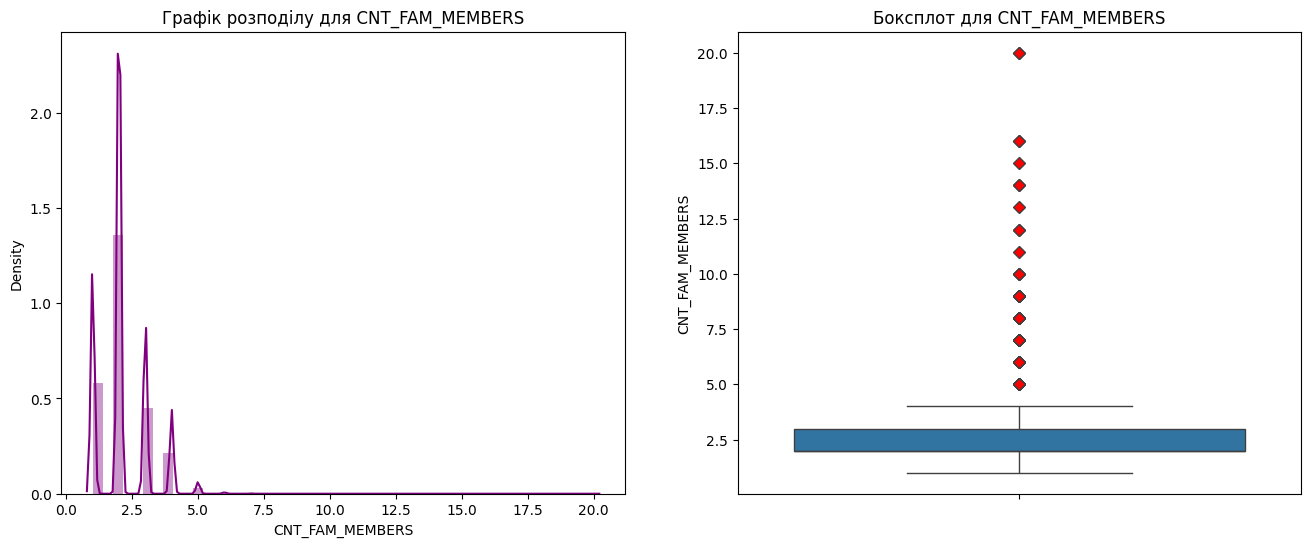

In [152]:
dist_box(df, 'CNT_FAM_MEMBERS')

Спостереження:
- мінімальне значення к-ті членів сім'ї до якого існують викиди є 1 та максимальне це 4. Отже всі значеня вище 4 є викидами

### AMT_ANNUITY

In [153]:
(df['AMT_ANNUITY'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
AMT_ANNUITY,
9000.00,2.08
13500.00,1.79
6750.00,0.74
10125.00,0.66
37800.00,0.52


In [154]:
df['AMT_ANNUITY'].describe(percentiles=[0.25,0.5,0.75,0.99,0.9999])

,AMT_ANNUITY
count,307499.00
mean,27108.57
std,14493.74
min,1615.50
25%,16524.00
50%,24903.00
75%,34596.00
99%,70006.50
99.99%,213291.00
max,258025.50


In [155]:
outlier_range(df,'AMT_ANNUITY')

np.float64(61704.0)

In [156]:
Q1 = df['AMT_ANNUITY'].quantile(0.25)
Q3 = df['AMT_ANNUITY'].quantile(0.75)
IQR = Q3 - Q1
Min_value = (Q1 - 1.5 * IQR)
Max_value = (Q3 + 1.5 * IQR)
Min_value,Max_value

(np.float64(-10584.0), np.float64(61704.0))

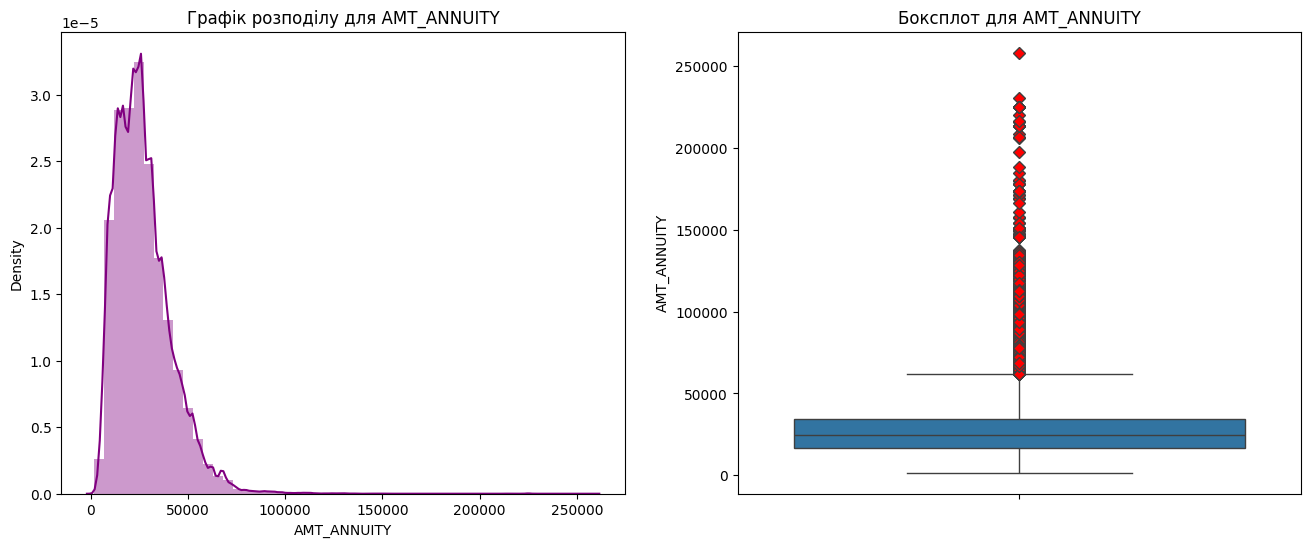

In [157]:
dist_box(df,'AMT_ANNUITY')

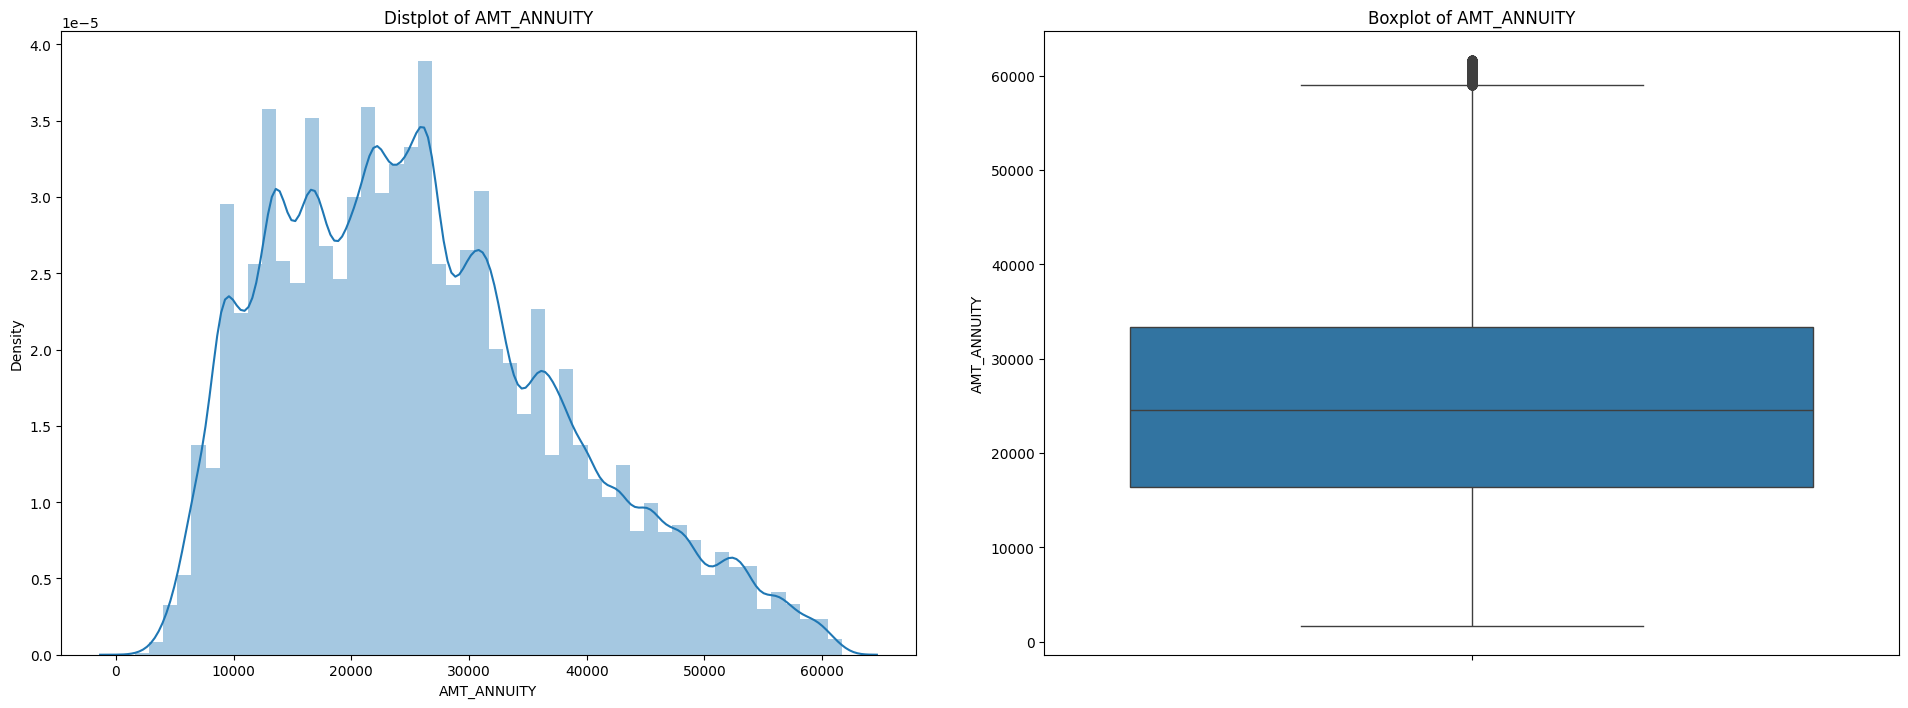

In [158]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.subplots(1,2 ,figsize = (20,8))

    plt.subplot(121)
    sns.distplot(df[df['AMT_ANNUITY'] < 61704].AMT_ANNUITY)
    pltname = 'Distplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.subplot(122)
    sns.boxplot(df[df['AMT_ANNUITY'] < 61704].AMT_ANNUITY)
    pltname = 'Boxplot of ' + 'AMT_ANNUITY'
    plt.title(pltname)

    plt.tight_layout(pad = 4)
    plt.show()

Висновок: викиди сумми вище ніж 61704

# Розбиття на біни безперервних колонок для аналізу

### Категоризація стовпця `AMT_GOODS_PRICE

In [159]:
df['AMT_GOODS_PRICE'].value_counts().sort_values(ascending = False).head()

,count
AMT_GOODS_PRICE,
450000.00,26300
225000.00,25282
675000.00,24962
900000.00,15416
270000.00,11428


In [160]:
(df['AMT_GOODS_PRICE'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
AMT_GOODS_PRICE,
450000.00,8.55
225000.00,8.22
675000.00,8.12
900000.00,5.01
270000.00,3.72


Подивимось статистичний звіт для `AMT_GOODS_PRICE

In [161]:
df['AMT_GOODS_PRICE'].describe(percentiles = [0.25,0.75,0.99,0.9999])

,AMT_GOODS_PRICE
count,307511.00
mean,538316.29
std,369288.98
min,40500.00
25%,238500.00
50%,450000.00
75%,679500.00
99%,1800000.00
99.99%,2933964.00
max,4050000.00


Розподілимо значення в `AMT_GOODS_PRICE` на 5 бінів і створимо новий стовпець `AMT_GOODS_PRICE_CATEGORY`.

In [162]:
df['AMT_GOODS_PRICE_CATEGORY'] = pd.cut(df['AMT_GOODS_PRICE'],
                                        bins = 5, labels = ['very low', 'low', 'medium', 'high', 'very high'])

Перевірка заповнення значень згідно з очікуванням

In [163]:
df['AMT_GOODS_PRICE_CATEGORY'].value_counts()

,count
AMT_GOODS_PRICE_CATEGORY,
very low,247251
low,56087
medium,4108
high,47
very high,18


### Категоризація стовпця `YEARS_BIRTH`

Ми будемо класифікувати `YEARS_BIRTH` замість `DAYS_BIRTH`, оскільки роки легше інтерпретувати, ніж дні

In [164]:
df['YEARS_BIRTH'].value_counts().sort_values(ascending = False).head()

,count
YEARS_BIRTH,
39,9023
38,8793
37,8727
40,8602
41,8495


In [165]:
(df['YEARS_BIRTH'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
YEARS_BIRTH,
39,2.93
38,2.86
37,2.84
40,2.80
41,2.76


Подивимось статистичний звіт для  `YEARS_BIRTH`

In [166]:
df['YEARS_BIRTH'].describe(percentiles = [0.25,0.75,0.99,0.9999])

,YEARS_BIRTH
count,307511.00
mean,43.94
std,11.96
min,21.00
25%,34.00
50%,43.00
75%,54.00
99%,67.00
99.99%,69.00
max,69.00


Категоризуймо значення з `YEARS_BIRTH` у новий стовпець `YEARS_BIRTH_CATEGORY`.

In [167]:
df['YEARS_BIRTH_CATEGORY'] = df['YEARS_BIRTH'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [168]:
df['YEARS_BIRTH_CATEGORY'].value_counts().sort_values(ascending = False)

,count
YEARS_BIRTH_CATEGORY,
30-40,82770
40-50,75509
50-60,67955
20-30,48869
60-70,32408


### Категоризація стовпця `YEARS_REGISTRATION`

Ми будемо класифікувати `YEARS_REGISTRATION` замість `DAYS_REGISTRATION`, оскільки роки легше інтерпретувати, ніж дні

In [169]:
df['YEARS_REGISTRATION'].value_counts().sort_values(ascending = False).head()

,count
YEARS_REGISTRATION,
1,15661
2,15564
3,13894
13,12866
12,12697


In [170]:
(df['YEARS_REGISTRATION'].value_counts(normalize = True).sort_values(ascending = False) * 100).head()

,proportion
YEARS_REGISTRATION,
1,5.09
2,5.06
3,4.52
13,4.18
12,4.13


Подивимось статистичний звіт для `YEARS_REGISTRATION`

In [171]:
df['YEARS_REGISTRATION'].describe(percentiles = [0.25,0.75,0.99,0.9999])

,YEARS_REGISTRATION
count,307511.00
mean,13.66
std,9.66
min,0.00
25%,6.00
50%,12.00
75%,20.00
99%,38.00
99.99%,54.25
max,68.00


Категоризуймо значення з `YEARS_REGISTRATION` в новий стовпець `YEARS_REGISTRATION_CATEGORY`.

In [172]:
df['YEARS_REGISTRATION_CATEGORY'] = df['YEARS_REGISTRATION'].apply(age_cat)

Перевірка заповнення значень згідно з очікуванням

In [173]:
df['YEARS_REGISTRATION_CATEGORY'].value_counts().sort_values(ascending = False)

,count
YEARS_REGISTRATION_CATEGORY,
0-20,230697
20-30,59288
30-40,16051
40-50,1406
50-60,60
60-70,9


# Зберігання оновлених даних зі стисненням

In [174]:
filename = "/content/drive/MyDrive/Colab Notebooks/data/application_data_processed"
compression_options = dict(method='zip', archive_name=f'{filename}.csv')
df.to_csv(f'{filename}.zip', compression=compression_options, index=False)

# Перевірка дисбалансу для цільового стовпця `TARGET`

### Аналіз стовпця `TARGET`

In [175]:
df['TARGET'].value_counts().sort_values(ascending = False)

,count
TARGET,
0,282686
1,24825


In [176]:
df['TARGET'].value_counts(normalize = True).sort_values(ascending = False) * 100

,proportion
TARGET,
0,91.93
1,8.07


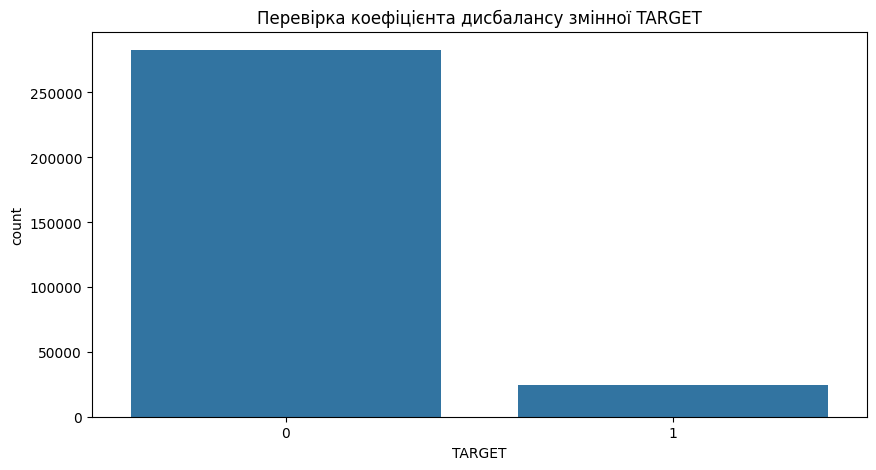

In [177]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['TARGET'], data = df)
plt.title('Перевірка коефіцієнта дисбалансу змінної TARGET')
plt.show()

**Спостереження**

- Ми маємо дисбаланс у змінній `TARGET` на основі % спостережень
 - Значення `TARGET` 1 - це клієнт, який має труднощі з оплатою (прострочення платежу більше ніж на X днів принаймні за одним з перших Y платежів за кредитом). Це лише 8,07% даних
 - Значення `TARGET` 0 - всі інші випадки, окрім 1. Це 91,93% даних

# Розподіл даних на основі `TARGET`

### Створіть новий фрейм даних зі значенням `TARGET` 1
- Значення `TARGET` 1 представляє клієнта з платіжними труднощами (він/вона прострочив платіж більш ніж на X днів принаймні по одному з перших Y платежів за кредитом). Це лише 8,07% даних

In [178]:
df1 = df[df['TARGET'] == 1]

In [179]:
df1.TARGET.value_counts()

,count
TARGET,
1,24825


### Створити новий фрейм даних зі значенням `TARGET` 0
- Значення `TARGET` 0 представляє всі інші випадки, крім 1. Це 91.93% даних

In [180]:
df0 = df[df['TARGET'] == 0]

In [181]:
df0.TARGET.value_counts()

,count
TARGET,
0,282686


# Одномірний аналіз категоріальних змінних

### Аналіз стовпця `NAME_CONTRACT_TYPE`

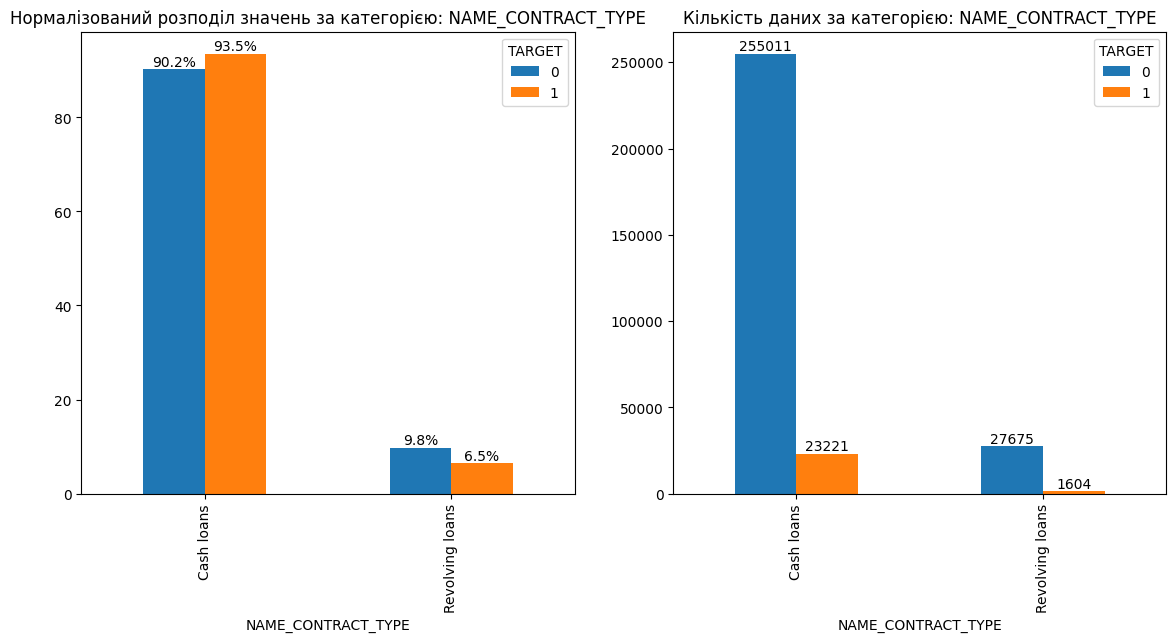

In [182]:
uni_cat_target_compare(df, 'NAME_CONTRACT_TYPE')

**Спостереження**

- Дивлячись на гістограми, ми не бачимо суттєвих відмінностей у `NAME_CONTRACT_TYPE` між клієнтами, які мають труднощі з оплатою, та клієнтами, які платять вчасно

**Висновок**
- Колонка `NAME_CONTRACT_TYPE` не надає жодних переконливих доказів на користь клієнтів, які мають труднощі з оплатою АБО вчасно сплачують

# ДЗ 4. Одновимірний аналіз категоріальної колонки

За наведеним прикладом вище, проведіть аналіз залежності між категоріальною колонкою і цільовою для колонок
- CODE_GENDER
- FLAG_OWN_CAR

Опціонально (для тих, кому цікаво дослідити більше даних)
- NAME_INCOME_TYPE
- NAME_EDUCATION_TYPE
- NAME_FAMILY_STATUS


Чи є вплив цих змінних на цільову та який саме?

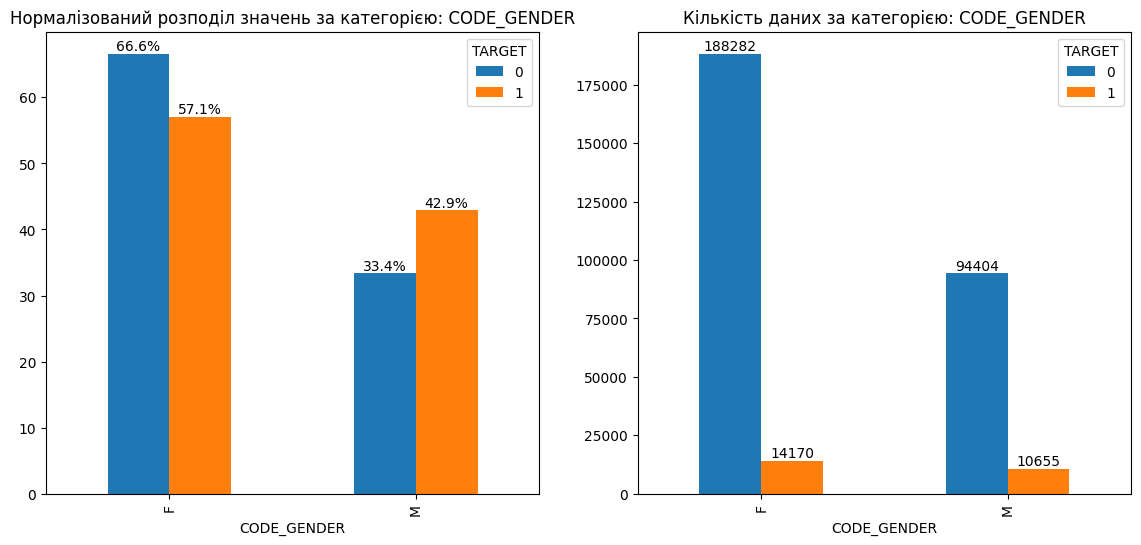

In [183]:
uni_cat_target_compare(df, 'CODE_GENDER')

### CODE_GENDER
З графіка видно, що залежності між TARGET та CODE_GENDER немає, що чоловіки що жінки майже однаково просрочують платежі відносно того як сплачуюють

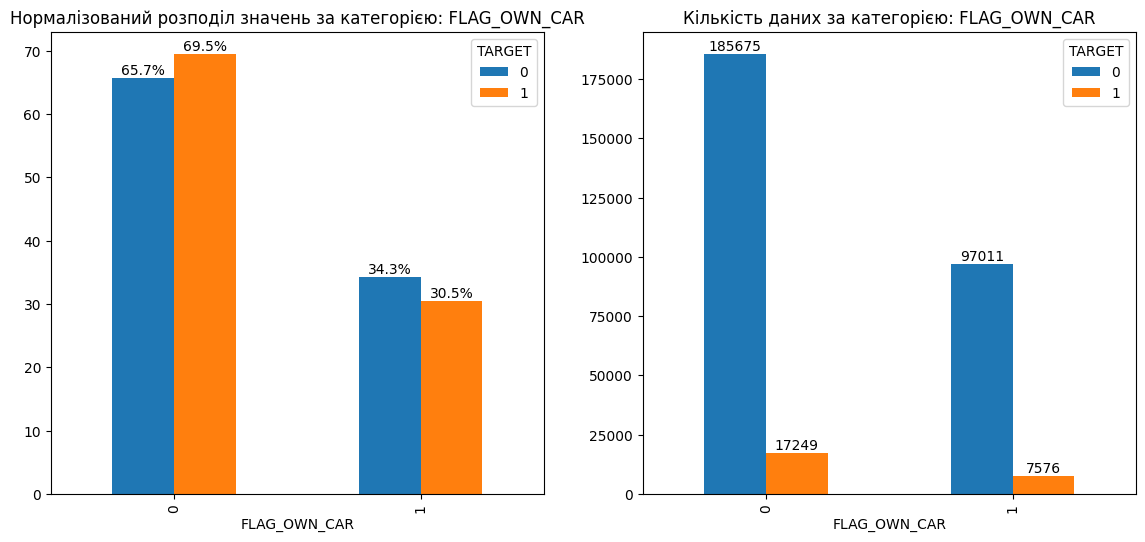

In [184]:
uni_cat_target_compare(df, 'FLAG_OWN_CAR')

### FLAG_OWN_CAR
З графіка видно, що у людей які не мають власної машини дещо вищий відсоток просрочки на 3,8% . У той же час відсоток прострочки у людей з власною машиною нижчий на 3,8%
Це дуже низькі показники, щоб розглядати залежність TARGET від FLAG_OWN_CAR

# Кореляційний аналіз числових змінних

### Побудова кореляційної матриці для випадків із платіжними труднощами

In [185]:
df1.select_dtypes(include=["int64","float64"]).shape

(24825, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицб `corr` для кращого перегляду результатів

In [186]:
corr_df1 = df1.select_dtypes(include=["int64","float64"]).corr()

In [187]:
corr_df1.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.00,0.00,-0.00,0.03,-0.01,-0.03,-0.26,-0.19,-0.15,0.03,0.89,0.04,0.04,-0.02,-0.02,-0.02,-0.01,-0.00,0.05,0.05,-0.01,-0.02,0.03,0.00,0.03,-0.01,-0.01,-0.00,-0.01,-0.01,-0.01,-0.02,-0.04,-0.26,-0.19,-0.15,0.03,-0.01
AMT_INCOME_TOTAL,NaN,0.00,1.00,0.04,0.05,0.04,0.01,-0.00,-0.01,-0.00,0.00,0.01,-0.02,-0.02,0.01,0.01,0.01,0.01,-0.00,-0.00,-0.00,0.01,-0.02,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.01,0.00,0.00,0.00
AMT_CREDIT,NaN,-0.00,0.04,1.00,0.75,0.98,0.07,0.14,0.00,0.03,0.05,0.05,-0.06,-0.07,0.03,0.02,0.03,0.03,-0.03,-0.04,-0.02,0.12,0.08,0.02,-0.03,0.02,-0.03,0.11,-0.01,0.00,0.01,0.06,-0.02,-0.04,0.14,0.00,0.03,0.05,0.11
AMT_ANNUITY,NaN,0.03,0.05,0.75,1.00,0.75,0.07,0.01,-0.08,-0.03,0.02,0.08,-0.07,-0.09,0.03,0.03,0.07,0.06,-0.01,0.00,0.01,0.12,0.04,0.01,-0.02,0.01,-0.03,0.08,0.01,-0.00,0.03,0.05,-0.01,-0.01,0.01,-0.08,-0.03,0.02,0.08


Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

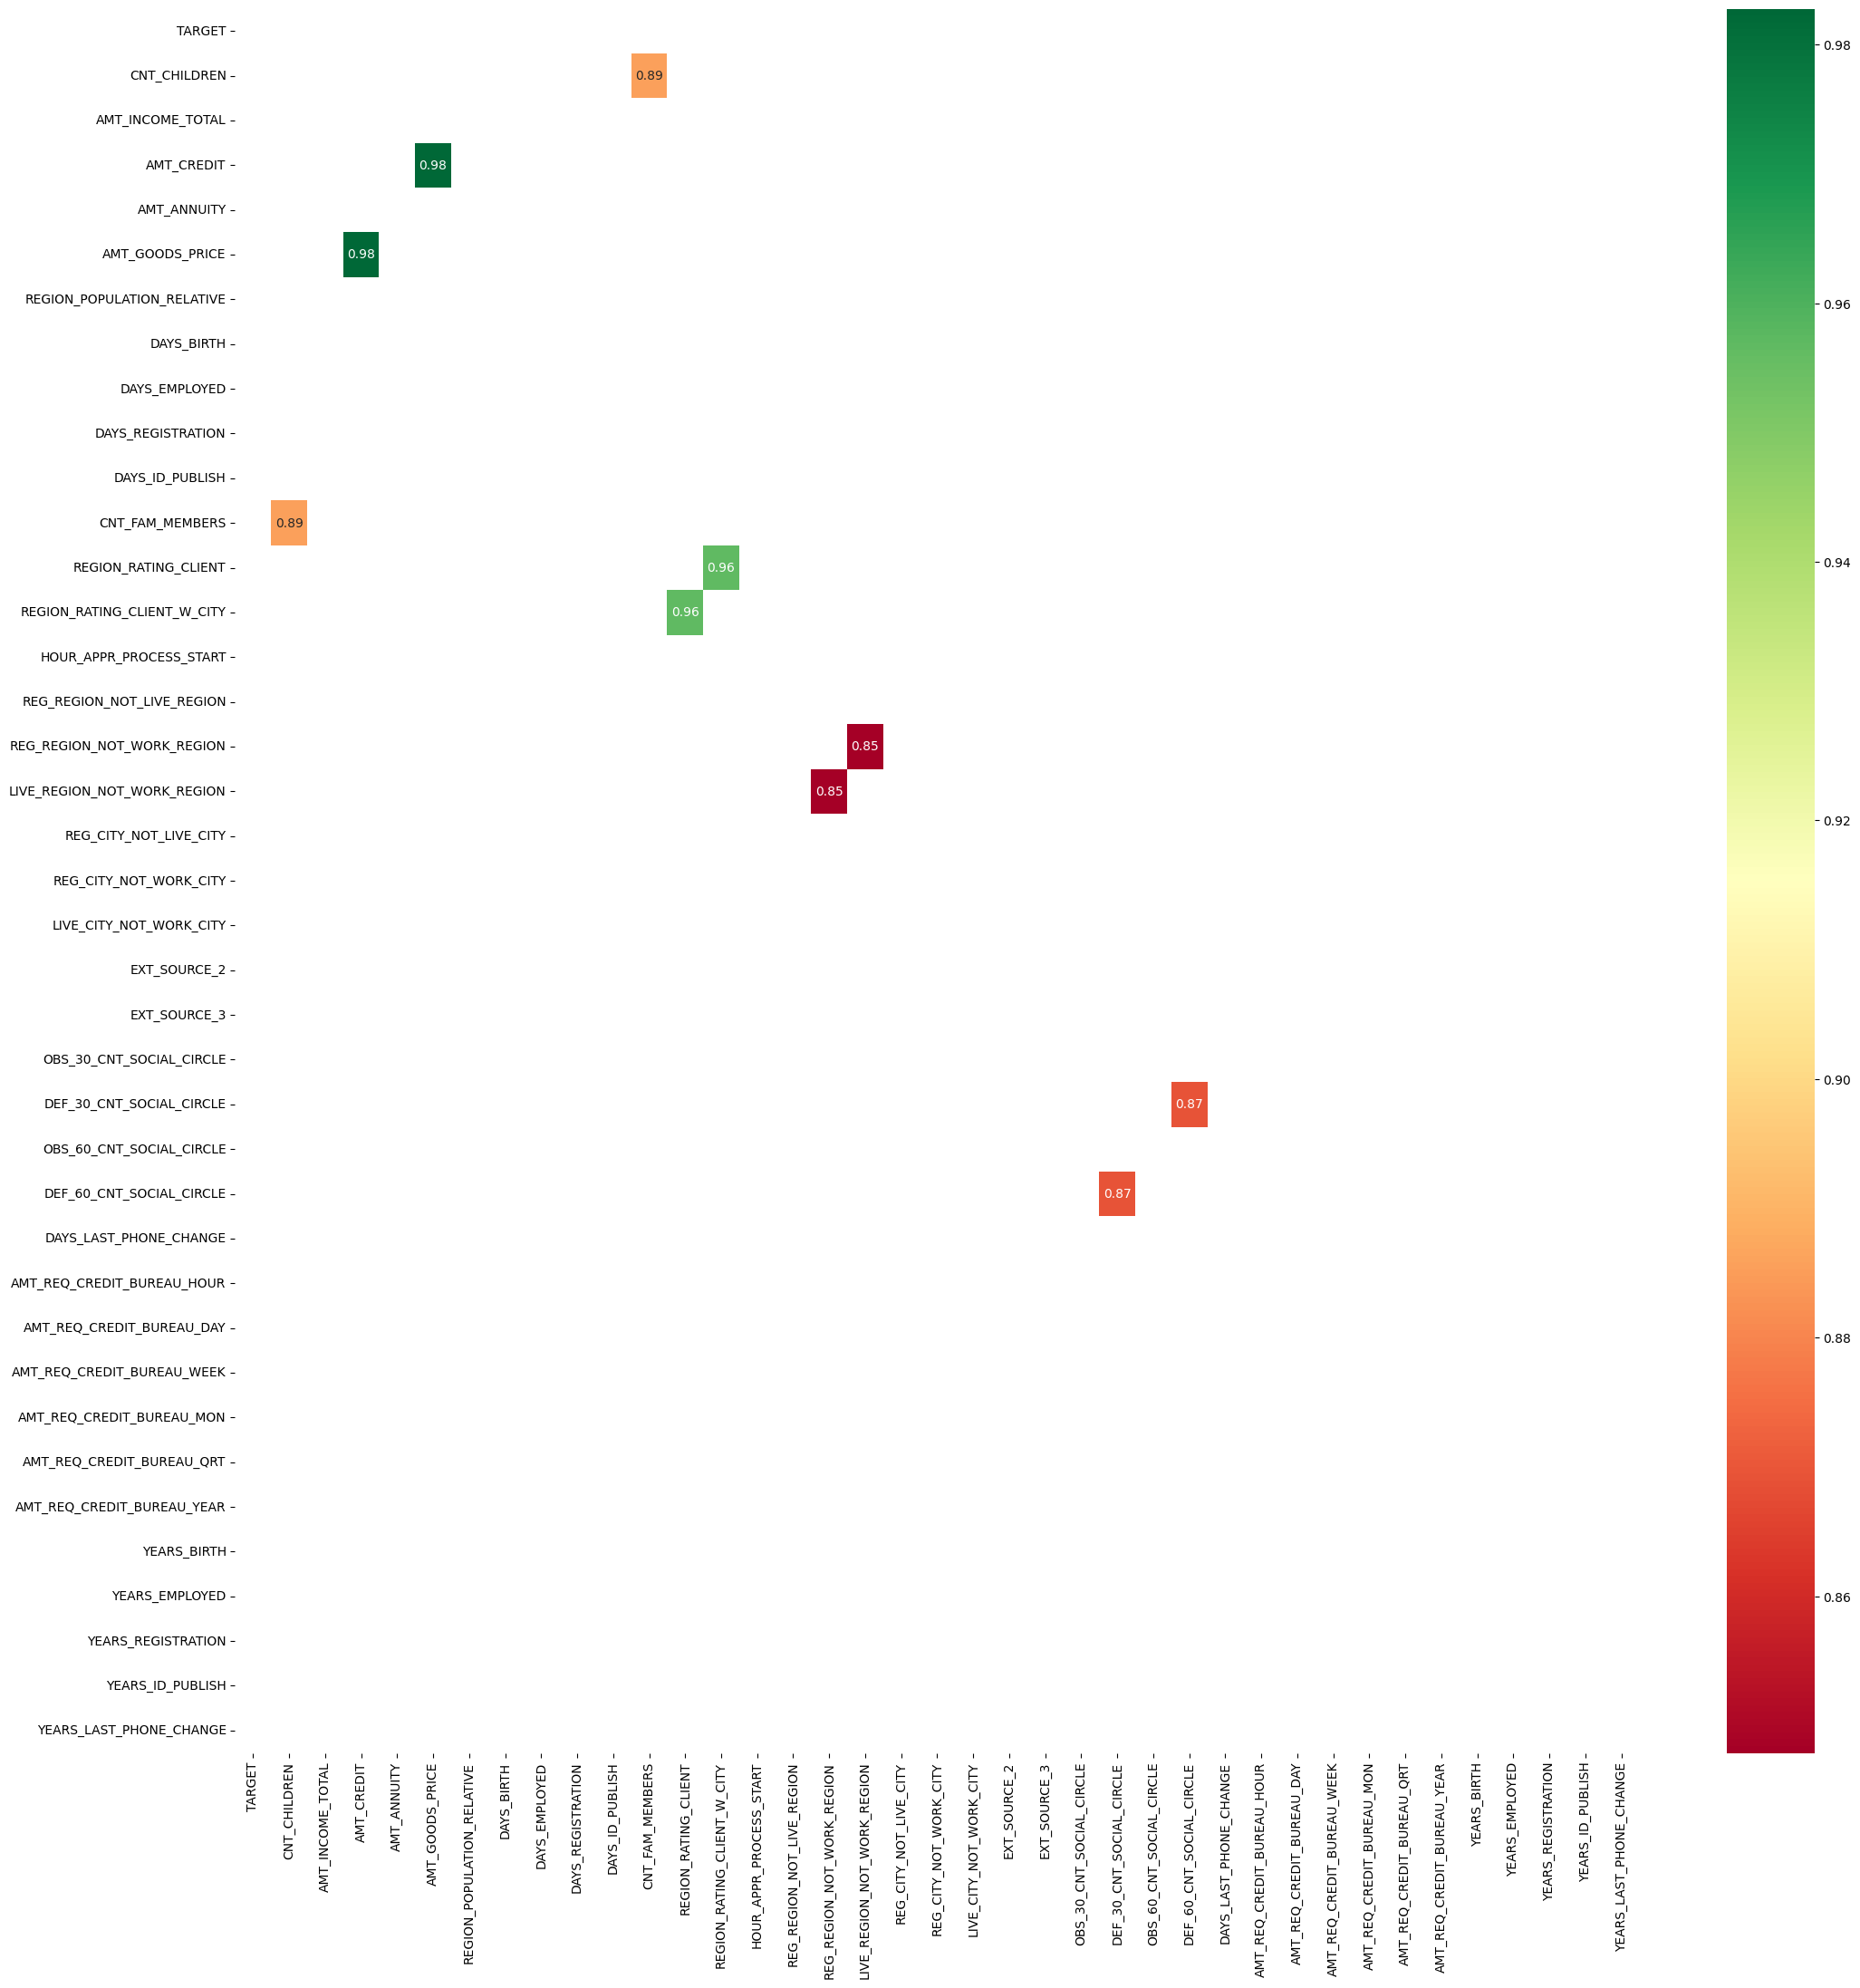

In [188]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df1[(corr_df1 >= 0.8) & (corr_df1 < 0.99)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для випадків із платіжними труднощами

In [189]:
corr_df1[corr_df1 <= 0.99].unstack().sort_values(ascending = False).head(22)

,,0
AMT_CREDIT,AMT_GOODS_PRICE,0.98
AMT_GOODS_PRICE,AMT_CREDIT,0.98
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.96
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.96
CNT_FAM_MEMBERS,CNT_CHILDREN,0.89
CNT_CHILDREN,CNT_FAM_MEMBERS,0.89
DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.87
DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.87
LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.85
REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.85


Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE -              AMT_CREDIT                    0.98
- REGION_RATING_CLIENT -         REGION_RATING_CLIENT_W_CITY   0.96
- CNT_FAM_MEMBERS -              CNT_CHILDREN                  0.89
- DEF_60_CNT_SOCIAL_CIRCLE -     DEF_30_CNT_SOCIAL_CIRCLE      0.87
- REG_REGION_NOT_WORK_REGION -   LIVE_REGION_NOT_WORK_REGION   0.85
- LIVE_CITY_NOT_WORK_CITY -      REG_CITY_NOT_WORK_CITY        0.78
- AMT_ANNUITY -                  AMT_GOODS_PRICE               0.75
- AMT_ANNUITY -                  AMT_CREDIT                    0.75
- DAYS_EMPLOYED -                FLAG_DOCUMENT_6               0.62
- DAYS_BIRTH -                   DAYS_EMPLOYED                 0.58

### Побудова кореляційної матриці для випадків із вчасними платежеми

In [190]:
df0.select_dtypes(include=["int64","float64"]).shape

(282686, 39)

Є 66 числових стовпчиків. Створимо кореляційну матрицю `corr` для кращого перегляду результатів

In [191]:
corr_df0 = df0.select_dtypes(include=["int64","float64"]).corr()

In [192]:
corr_df0.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
TARGET,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNT_CHILDREN,NaN,1.00,0.03,0.00,0.02,-0.00,-0.02,-0.34,-0.25,-0.19,0.03,0.88,0.02,0.02,-0.01,-0.01,0.01,0.02,0.02,0.07,0.07,-0.02,-0.04,0.01,-0.00,0.01,-0.00,0.01,-0.00,0.00,-0.00,-0.01,-0.01,-0.04,-0.34,-0.25,-0.19,0.03,0.01
AMT_INCOME_TOTAL,NaN,0.03,1.00,0.34,0.42,0.35,0.17,-0.06,-0.14,-0.06,-0.02,0.03,-0.19,-0.20,0.08,0.07,0.14,0.13,0.01,0.02,0.02,0.14,-0.07,-0.03,-0.03,-0.03,-0.03,0.04,0.00,0.01,0.01,0.06,0.01,0.03,-0.06,-0.14,-0.06,-0.02,0.04
AMT_CREDIT,NaN,0.00,0.34,1.00,0.77,0.99,0.10,0.05,-0.07,-0.01,0.00,0.06,-0.10,-0.11,0.05,0.02,0.05,0.05,-0.03,-0.02,0.00,0.13,0.04,-0.00,-0.02,-0.00,-0.02,0.07,-0.00,0.00,-0.00,0.05,0.02,-0.05,0.05,-0.07,-0.01,0.00,0.07
AMT_ANNUITY,NaN,0.02,0.42,0.77,1.00,0.78,0.12,-0.01,-0.10,-0.04,-0.01,0.08,-0.13,-0.15,0.05,0.04,0.08,0.08,-0.01,0.00,0.01,0.13,0.03,-0.01,-0.02,-0.01,-0.02,0.06,0.00,0.00,0.01,0.04,0.01,-0.01,-0.01,-0.10,-0.04,-0.01,0.06


Створимо теплову карту для перегляду кореляцій вище 80% і 99,99%

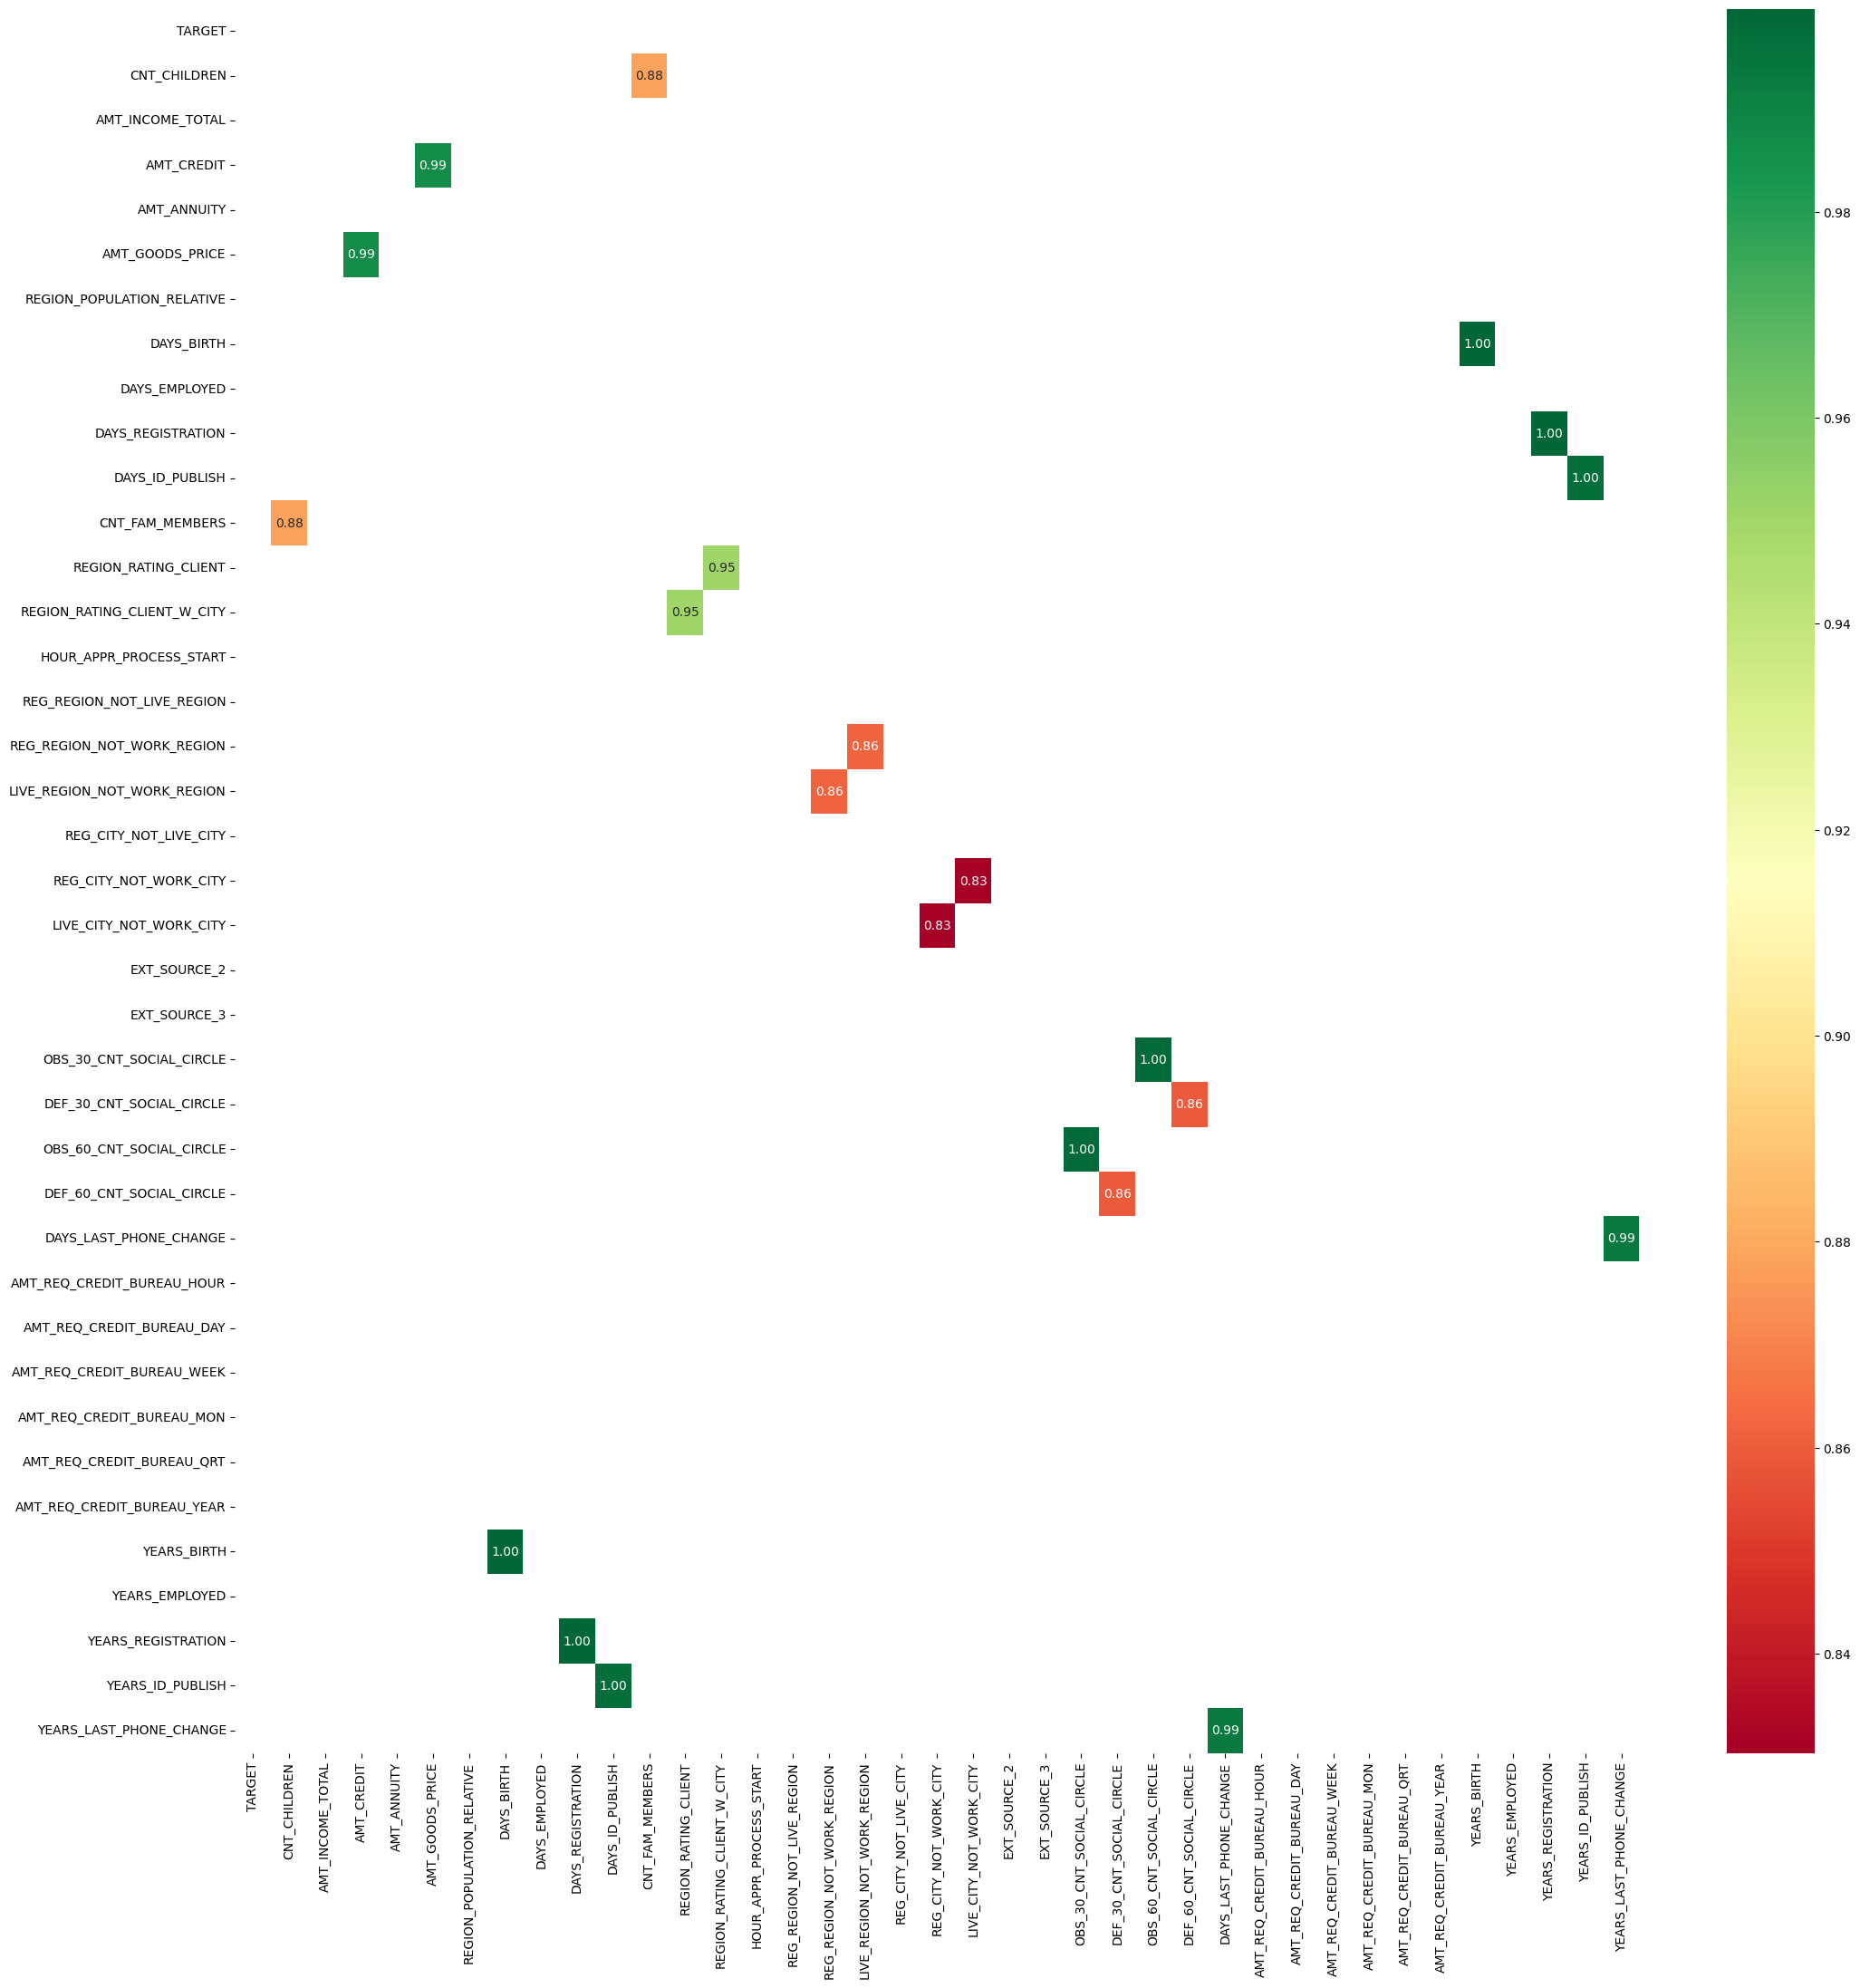

In [193]:
plt.figure(figsize = (25,25))
sns.heatmap(data = corr_df0[(corr_df0 >= 0.8) & (corr_df0 < 0.9999)], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

### Подивимось на 10 найкращих кореляцій для вчасних платежів

In [194]:
corr_df0[corr_df0 <= 0.99].unstack().sort_values(ascending = False).head(28)

,,0
AMT_CREDIT,AMT_GOODS_PRICE,0.99
AMT_GOODS_PRICE,AMT_CREDIT,0.99
REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.95
REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,0.95
CNT_FAM_MEMBERS,CNT_CHILDREN,0.88
CNT_CHILDREN,CNT_FAM_MEMBERS,0.88
LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.86
REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,0.86
DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.86
DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.86


Оскільки у нас є комбінації, що повторюються, дивлячись на наведену вище таблицю і видаляючи дублі, ми отримуємо топ-10 кореляцій, як показано нижче:

- AMT_GOODS_PRICE              AMT_CREDIT                    0.99
- REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
- CNT_FAM_MEMBERS              CNT_CHILDREN                  0.88
- REG_REGION_NOT_WORK_REGION   LIVE_REGION_NOT_WORK_REGION   0.86
- DEF_30_CNT_SOCIAL_CIRCLE     DEF_60_CNT_SOCIAL_CIRCLE      0.86
- LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY        0.83
- AMT_ANNUITY                  AMT_GOODS_PRICE               0.78
- AMT_ANNUITY                  AMT_CREDIT                    0.77
- DAYS_BIRTH                   DAYS_EMPLOYED                 0.63
- DAYS_EMPLOYED                FLAG_DOCUMENT_6               0.60

### Порівняємо 10 найкращих кореляцій між випадками із платіжними труднощами та вчасними платежами

**Спостереження**

- Топ-10 кореляцій для Труднощів з оплатою та Вчасних платежів однакові, за винятком незначних відмінностей у відсотках кореляції
- Найвища кореляція для комбінації `AMT_GOODS_PRICE` та `AMT_CREDIT`.
- Для набору даних "Труднощі з оплатою" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,98
- Для набору даних "Вчасні платежі" кореляція між `AMT_GOODS_PRICE` та `AMT_CREDIT` становить 0,99

# Одновимірний аналіз числових змінних

### Аналіз стовпця `AMT_CREDIT`

#### Пошук викидів в `AMT_CREDIT` при випадках із платіжними труднощами

Розрахунок IQR (Inter Quartile range)

In [195]:
Q1 = df1['AMT_CREDIT'].quantile(0.25)
Q3 = df1['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

448915.5


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [196]:
Min_value1 = (Q1 - 1.5 * IQR)
Max_value1 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value1))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value1))

Мінімальне значення, до якого існують викиди: -388973.25
Максимальне значення, після якого існують викиди: 1406688.75


#### Пошук викидів в `AMT_CREDIT` при випадках із вчасними оплатами

Розрахунок IQR (Inter Quartile range)

In [197]:
Q1 = df0['AMT_CREDIT'].quantile(0.25)
Q3 = df0['AMT_CREDIT'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

540000.0


Значення *до* (Q1 - 1.5 * IQR) та *після* (Q3 + 1.5 * IQR) є викидами.

In [198]:
Min_value0 = (Q1 - 1.5 * IQR)
Max_value0 = (Q3 + 1.5 * IQR)
print("Мінімальне значення, до якого існують викиди: {}".format(Min_value0))
print("Максимальне значення, після якого існують викиди: {}".format(Max_value0))

Мінімальне значення, до якого існують викиди: -540000.0
Максимальне значення, після якого існують викиди: 1620000.0


Видалення викидів і побудова діаграми розподілу

In [219]:
def kde_no_outliers(df0, df1, Max_value0, Max_value1, column):
  plt.figure(figsize = (14,6))
  sns.kdeplot(df1[df1[column] <= Max_value1][column],label = 'Payment difficulties')
  sns.kdeplot(df0[df0[column] <= Max_value0][column],label = 'On-Time Payments')
  plt.ticklabel_format(style='plain', axis='x')
  plt.xticks(rotation = 30)
  plt.legend()
  plt.show()

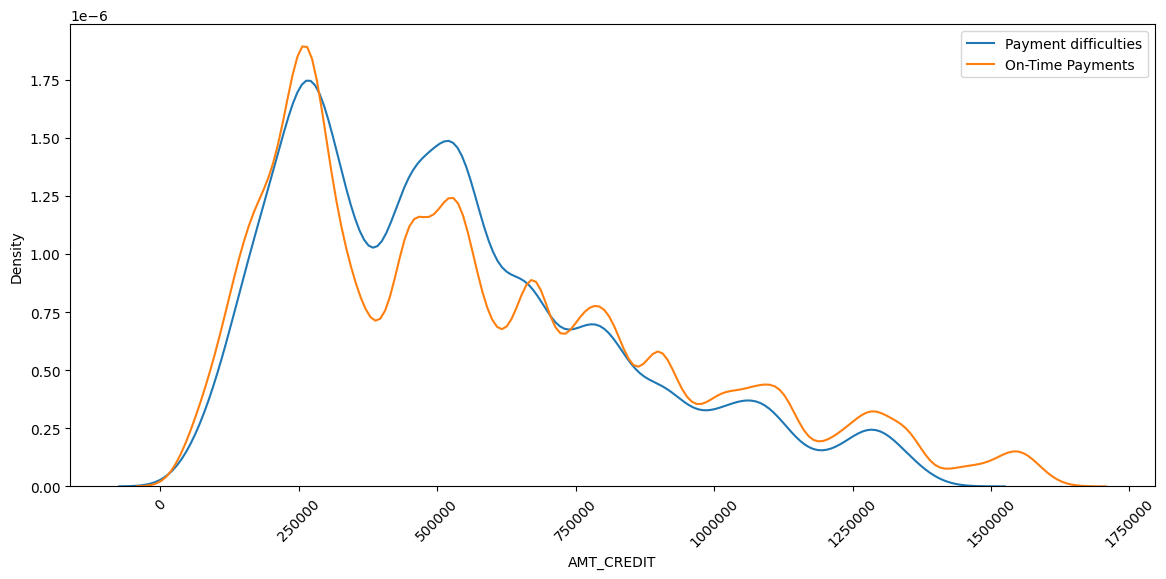

In [214]:
kde_no_outliers(df0, df1, Max_value0, Max_value1, 'AMT_CREDIT')

**Спостереження**

- Для `AMT_CREDIT` від 250000 до приблизно 650000 більше клієнтів мають труднощі з оплатою
- Для `AMT_CREDIT` > 750000 більше клієнтів, які вчасно здійснюють платежі

# ДЗ 5. Одновимірний аналіз числової колонки

За наведеним вище прикладом, проведіть одновимірний аналіз (виявлення викидів, їх усунення та побудова KDE  графіку) для числових змінних
- `YEARS_BIRTH`
- `AMT_GOODS_PRICE`
- `DAYS_EMPLOYED`

Опціонально:
- `CNT_CHILDREN`
- `AMT_INCOME_TOTAL`

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.

Зробіть висновки з аналізу.

In [1]:
def one_dimensional_analysis(column_name):
  Q1 = df0[column_name].quantile(0.25)
  Q3 = df0[column_name].quantile(0.75)
  IQR = Q3 - Q1
  Min_value0 = (Q1 - 1.5 * IQR)
  Max_value0 = (Q3 + 1.5 * IQR)
  kde_no_outliers(df0, df1, Max_value0, Max_value1, column_name)


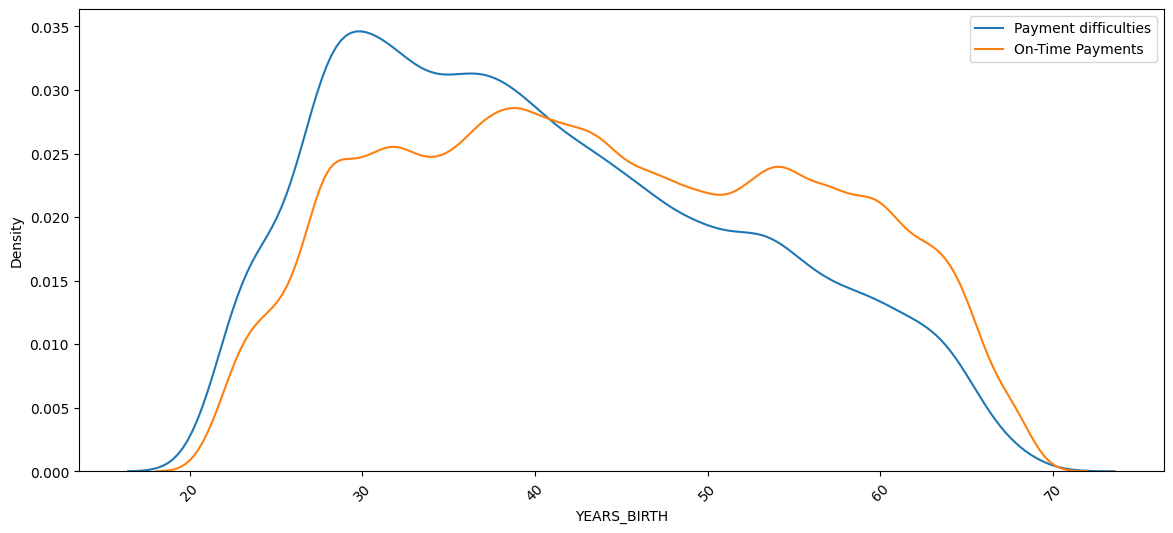

In [206]:
one_dimensional_analysis('YEARS_BIRTH')

### YEARS_BIRTH
Бачимо, що найбільша кількість людей, яка стикається з труднощами вчасного погашення заборгованості це люди приблизно віком від 18 до 40 років.
В той же ж час після 40 років білша частина вчасно сплачує платежі

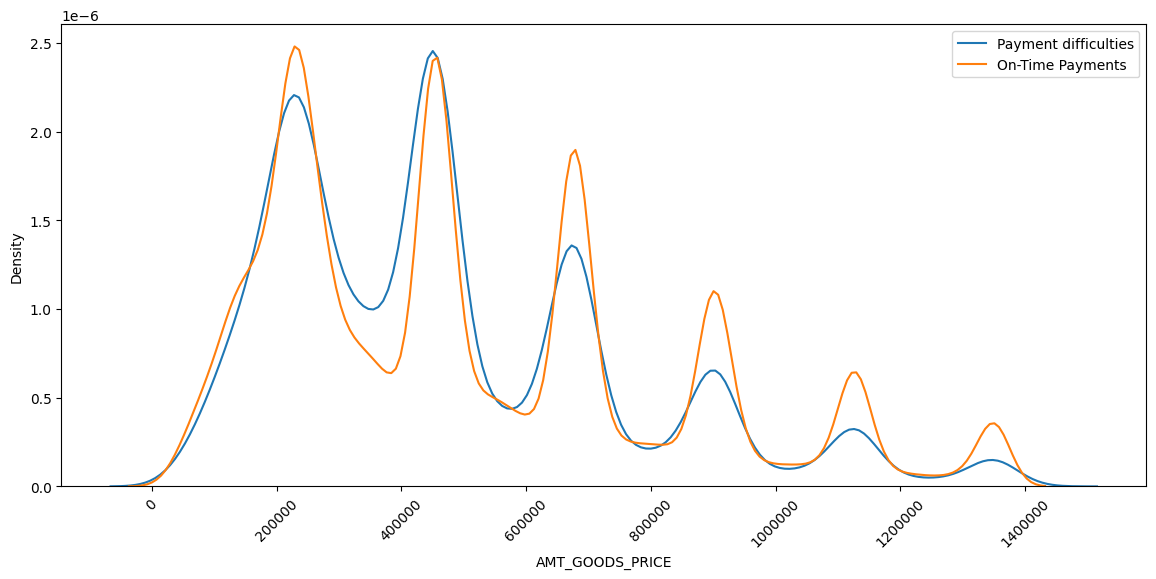

In [202]:
one_dimensional_analysis('AMT_GOODS_PRICE')

### AMT_GOODS_PRICE
Люди з майном приблизно від 300к до 450к більше схильні прострочувати платежі, ніж особи з нижчими або значно вищими оцінками майна

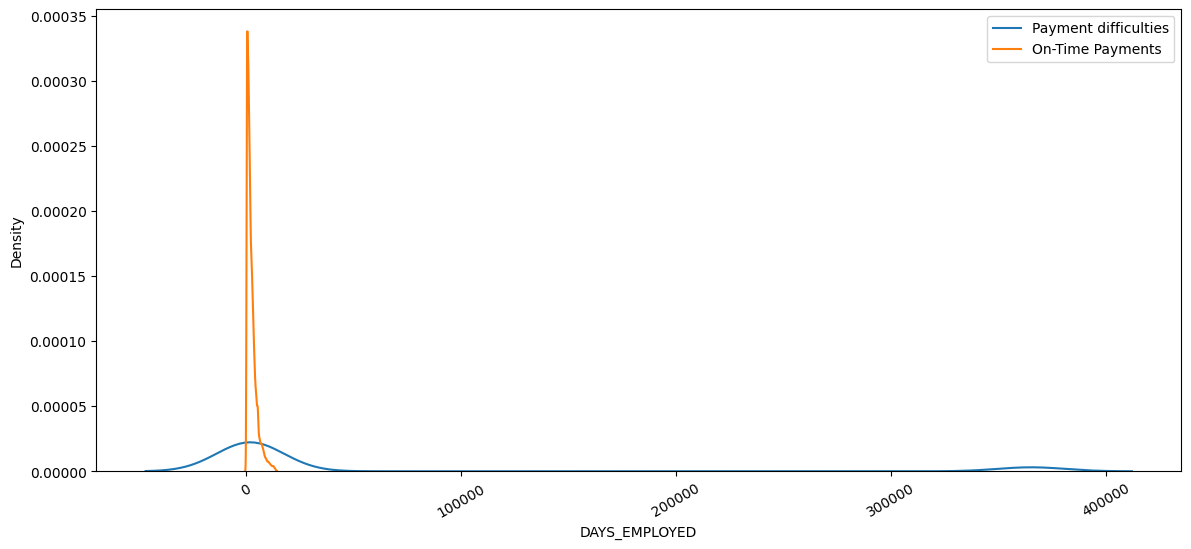

In [222]:
one_dimensional_analysis('DAYS_EMPLOYED')

### DAYS_EMPLOYED
Заважає побачити повну картину те що пенсіонери позначенні значеням 365243. Я б замість DAYS_EMPLOYED ввела YEARS_EMPLOYED та ввела б категорії років замість років. Тоді б було легше визначити яка категорія найчастіше прострочує платежі.
Але уже я цього не зроблю, бо дороблюю за годину до дедлайну.

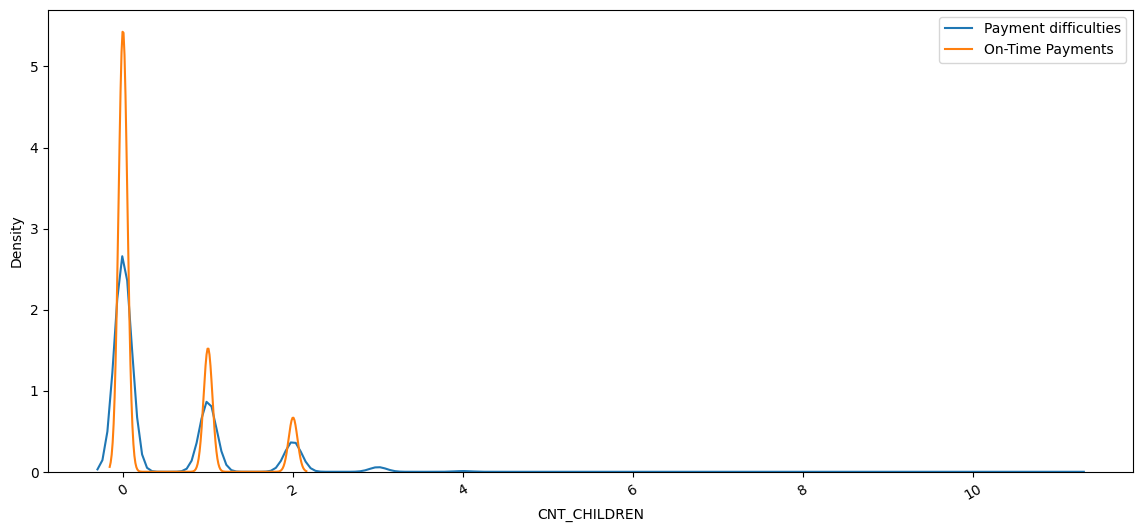

In [223]:
one_dimensional_analysis('CNT_CHILDREN')

З графіка можна зробити висновок, що при більше двох дітей є трудності по виплатам

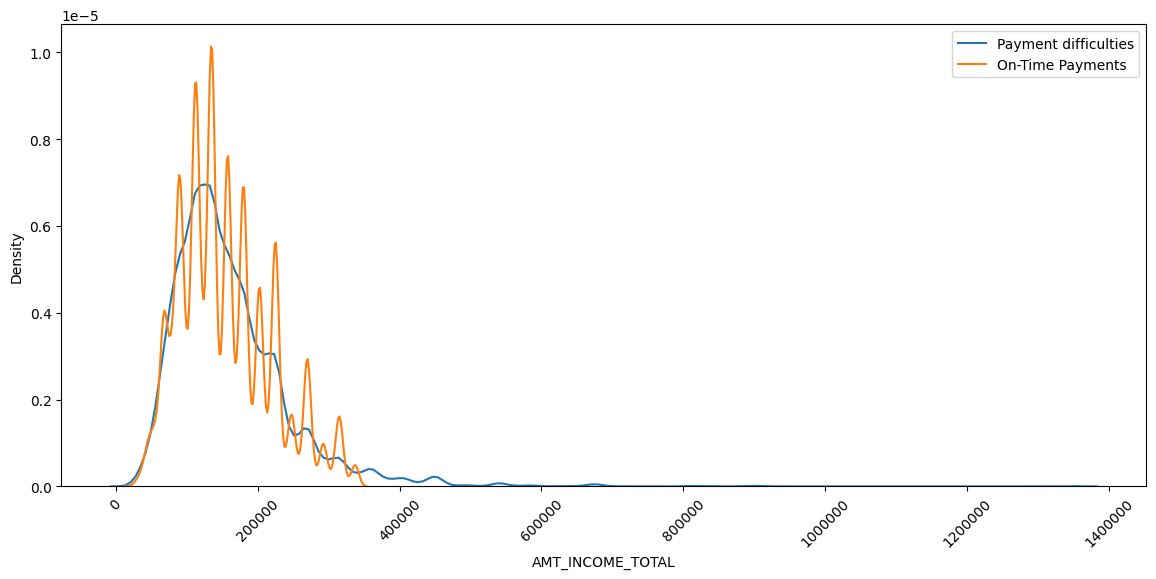

In [205]:
one_dimensional_analysis('AMT_INCOME_TOTAL')

# Двовимірний/Багатовимірний аналіз

## Неперервні vs неперервні змінні

### Аналіз стовпця `AMT_GOODS_PRICE` vs `AMT_CREDIT`

**Пошук викидів для ствопця `AMT_GOODS_PRICE ` для групи із платіжними труднощами**

In [225]:
max_value1_AMT_GOODS_PRICE = outlier_range(df1,'AMT_GOODS_PRICE')
max_value1_AMT_GOODS_PRICE

np.float64(1329750.0)

**Пошук викидів для ствопця `AMT_CREDIT` для групи із платіжними труднощами**

In [226]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

**Пошук викидів для `AMT_GOODS_PRICE `для групи із вчасними оплатами**

In [227]:
max_value0_AMT_GOODS_PRICE = outlier_range(df0,'AMT_GOODS_PRICE')
max_value0_AMT_GOODS_PRICE

np.float64(1354755.9375)

**Пошук викидів для `AMT_CREDIT `для групи із вчасними оплатами**

In [228]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

Побудова діаграми розсіювання для порівняння з видаленими викидами

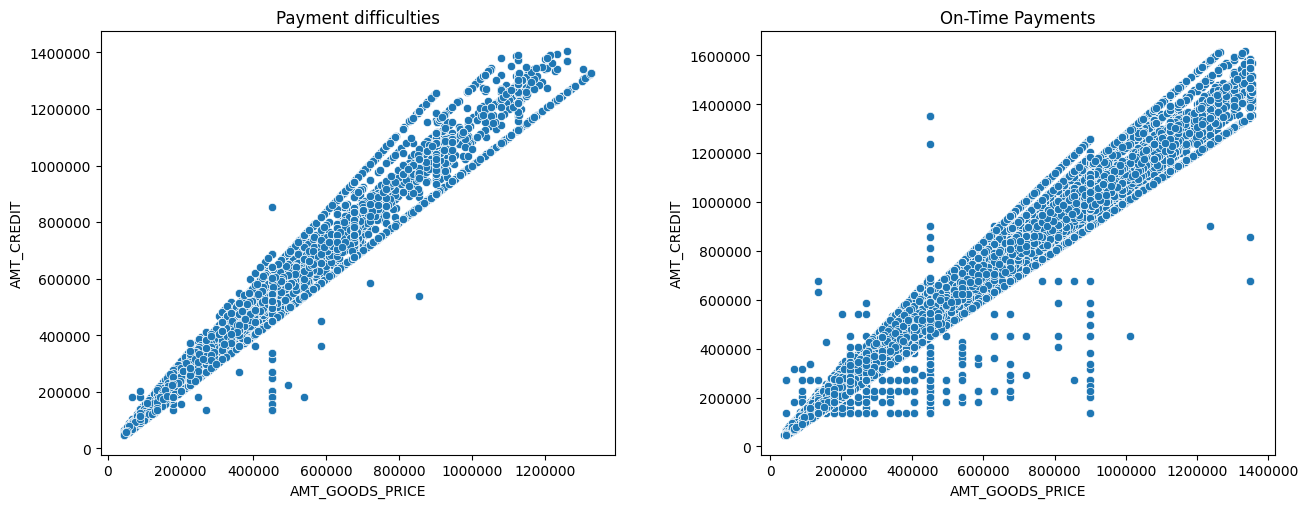

In [229]:
plt.figure(figsize = (14, 6))

plt.subplot(1,2,1)
plt.title('Payment difficulties')
sns.scatterplot(x = df1[df1['AMT_GOODS_PRICE'] < max_value1_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df1[df1['AMT_CREDIT'] < max_value1_AMT_CREDIT].AMT_CREDIT, data = df1)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.subplot(1,2,2)
plt.title('On-Time Payments')
sns.scatterplot(x = df0[df0['AMT_GOODS_PRICE'] < max_value0_AMT_GOODS_PRICE].AMT_GOODS_PRICE,
                y = df0[df0['AMT_CREDIT'] < max_value0_AMT_CREDIT].AMT_CREDIT, data = df0)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')

plt.tight_layout(pad = 4)
plt.show()

**Спостереження**
- AMT_GOODS_PRICE та AMT_CREDIT мають сильну позитивну кореляцію. Це означає, що зі збільшенням ціни товару зростає і сума кредиту

# ДЗ 6. Кореляційний аналіз для пари числових змінних

За наведеним вище прикладом, проведіть кореляційний аналіз для пар змінних
- AMT_ANNUITY і AMT_CREDIT

Опціонально:
- DAYS_EMPLOYED і AMT_INCOME_TOTAL
- AMT_CREDIT і DAYS_BIRTH

[Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної двійки змінних.](https://)
Зробіть висновок про наявність кореляції між змінними.

In [239]:
def corr_analysis(column1, column2):
    max_value1_1 = outlier_range(df1, column1)
    max_value1_2 = outlier_range(df1, column2)
    max_value0_1 = outlier_range(df0, column1)
    max_value0_2 = outlier_range(df0, column2)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.title('Payment difficulties')
    sns.scatterplot(x=df1[df1[column1] < max_value1_1][column1],
                    y=df1[df1[column2] < max_value1_2][column2])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

    plt.subplot(1, 2, 2)
    plt.title('On-Time Payments')
    sns.scatterplot(x=df0[df0[column1] < max_value0_1][column1],
                    y=df0[df0[column2] < max_value0_2][column2])
    plt.ticklabel_format(style='plain', axis='x')
    plt.ticklabel_format(style='plain', axis='y')

    plt.tight_layout(pad=4)
    plt.show()


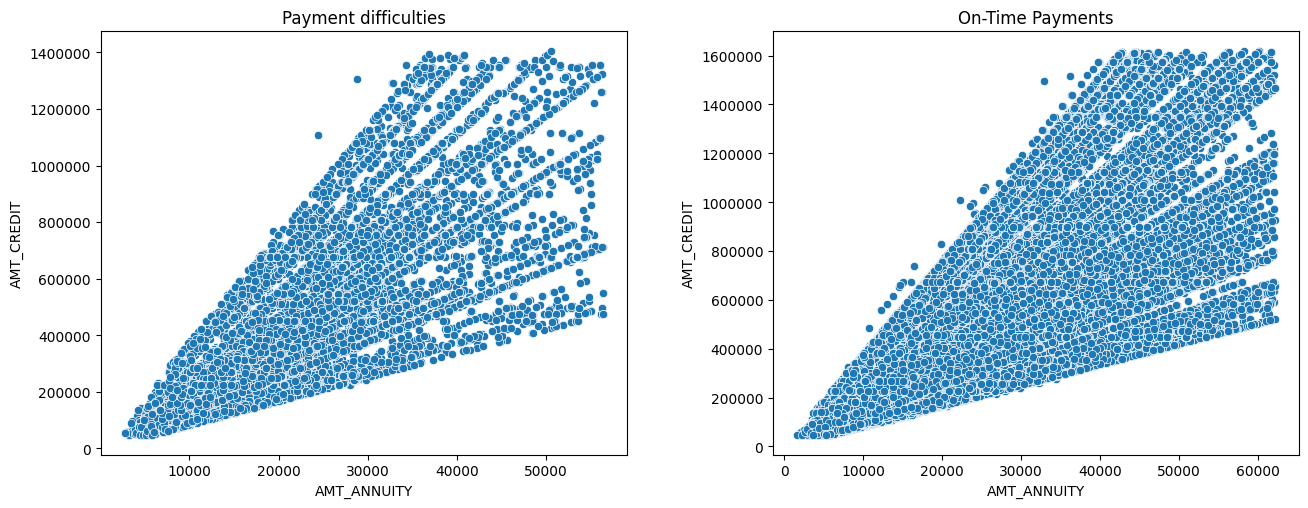

In [240]:
corr_analysis('AMT_ANNUITY','AMT_CREDIT')

Висновок: кореляція між AMT_ANNUITY та AMT_CREDIT є, проте дані виглядають пучками, а не чіткою діагоналлю

## Неперервні та категоріальні змінні

In [243]:
def draw_boxplot(df, categorical, continuous, max_continuous, title, hue_column, subplot_position):
    """
    Малює блок-діаграму для заданого DataFrame, категоріальної та неперервної змінної.
    """
    plt.subplot(1, 2, subplot_position)
    plt.title(title)
    red_diamond = dict(markerfacecolor='r', marker='D')
    sns.boxplot(x=categorical,
                y=df[df[continuous] < max_continuous][continuous],
                data=df,
                flierprops=red_diamond,
                order=sorted(df[categorical].unique(), reverse=True),
                hue=hue_column, hue_order=sorted(df[hue_column].unique(), reverse=True))
    plt.ticklabel_format(style='plain', axis='y')
    plt.xticks(rotation=90)

def bi_boxplot(categorical, continuous, max_continuous1, max_continuous0, hue_column):
    """
    Створює паралельні блок-діаграми для двох груп, визначених у наборі даних, на основі
    категоріальної та неперервної змінної, виділяючи відмінності за допомогою відтінків.
    """
    plt.figure(figsize=(16, 10))

    # Графік для першо групи "Труднощі з платежами" (Payment Difficulties)
    draw_boxplot(df1, categorical, continuous, max_continuous1, 'Payment Difficulties', hue_column, 1)

    # Графік для другої групи "Вчасні оплати" (On-Time Payments)
    draw_boxplot(df0, categorical, continuous, max_continuous0, 'On-Time Payments', hue_column, 2)

    plt.tight_layout(pad=4)
    plt.show()

### Аналіз стовпців `AMT_CREDIT` vs `NAME_EDUCATION_TYPE` vs `CODE_GENDER`

**Пошук викидів для `AMT_CREDIT `для групи із платіжними труднощами**

In [ ]:
max_value1_AMT_CREDIT = outlier_range(df1,'AMT_CREDIT')
max_value1_AMT_CREDIT

np.float64(1406688.75)

**Пошук викидів для `AMT_CREDIT ` для групи із вчасними платежами**

In [ ]:
max_value0_AMT_CREDIT = outlier_range(df0,'AMT_CREDIT')
max_value0_AMT_CREDIT

np.float64(1620000.0)

**Клієнт з платіжними труднощами**

In [244]:
df1.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                         
Academic degree     F              3.00 950245.50 504711.38 544491.00   
Higher education    F           2438.00 648500.58 410415.70  47970.00   
                    M           1571.00 642070.94 409695.93  45000.00   
Incomplete higher   F            504.00 520150.35 352227.49  91692.00   
                    M            368.00 554723.82 347843.71  74628.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           667660.50 790830.00 1153122.75 1515415.50  
Higher education    F           323595.00 545040.00  877500.00 2687355.00  
                    M           329202.00 545040.00  832797.00 2695500.00  
Incomplete higher   F           269550.00 450000.00  675000.00 2695500.00  
                    M           284400.00 497520.00  699976.12 2013840.00

**Клієнт зі вчасними платежами**

In [245]:
df0.groupby(by = ['NAME_EDUCATION_TYPE','CODE_GENDER']).AMT_CREDIT.describe().head()

count      mean       std       min  \
NAME_EDUCATION_TYPE CODE_GENDER                                          
Academic degree     F              97.00 708770.74 463052.42 130824.00   
                    M              64.00 735235.38 497739.97  74182.50   
Higher education    F           47852.00 682485.00 456642.78  45000.00   
                    M           23002.00 713144.54 486073.66  45000.00   
Incomplete higher   F            5780.00 555340.53 385980.60  45000.00   

                                      25%       50%        75%        max  
NAME_EDUCATION_TYPE CODE_GENDER                                            
Academic degree     F           354469.50 607500.00 1006920.00 2463840.00  
                    M           309519.00 610056.00 1036890.00 1984500.00  
Higher education    F           302206.50 568057.50  916470.00 4050000.00  
                    M           315000.00 592560.00  973503.00 4050000.00  
Incomplete higher   F           253737.00 454500.00  760225.50 2517300.00

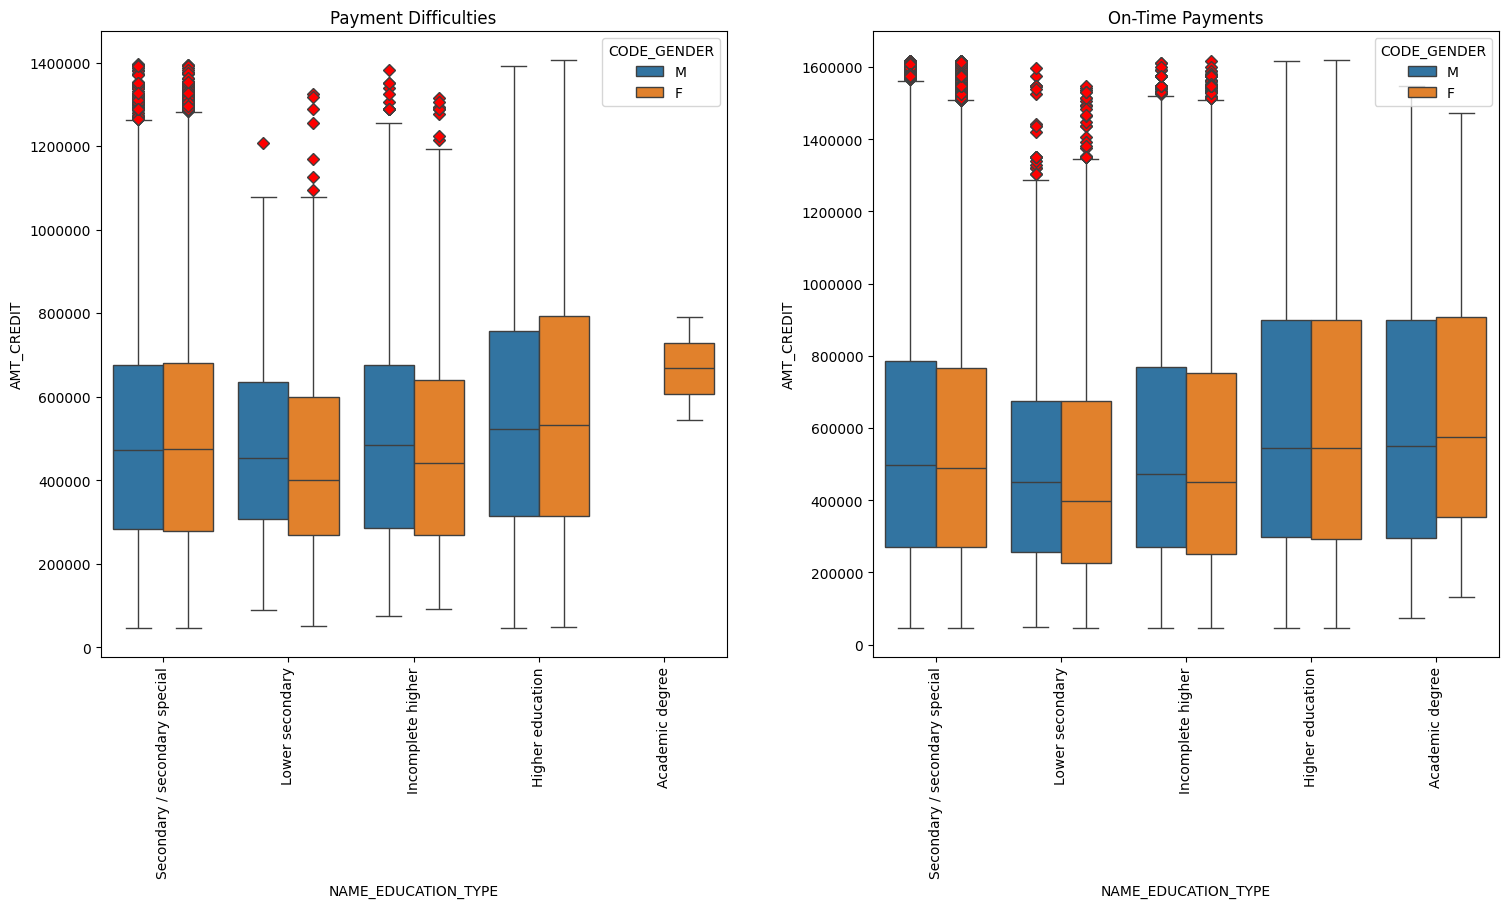

In [246]:
bi_boxplot('NAME_EDUCATION_TYPE','AMT_CREDIT',max_value1_AMT_CREDIT, max_value0_AMT_CREDIT, 'CODE_GENDER')

**Спостереження
- Клієнти з "академічним ступенем" мають широкий діапазон кредитів для своєчасних платежів, тоді як для клієнтів з проблемами з оплатою цей діапазон значно нижчий
- Якщо поглянути на зведену статистику, то клієнти з "вищою освітою" та проблемами з оплатою беруть середній та медіанний кредит у значно більшому діапазоні, ніж клієнти з вчасною оплатою.
- Клієнти-чоловіки з "вищою освітою" завжди сплачують кредит вчасно

 # ДЗ 7. Кореляційний аналіз між двома категоріальними змінними і числовою

Проведіть аналогічний кореляційний аналіз для трійок змінних

- AMT_INCOME_TOTAL vs NAME_FAMILY_STATUS vs CODE_GENDER

Опціонально - трійки які можна додатково проаналізувати:
- AMT_INCOME_TOTAL vs YEARS_BIRTH_CATEGORY vs NAME_HOUSING_TYPE
- AMT_GOODS_PRICE vs NAME_INCOME_TYPE vs CODE_GENDER
- AMT_INCOME_TOTAL vs OCCUPATION_TYPE vs CODE_GENDER

А ще можете також проаналізувати додатково до обовʼязкової свою трійку :)

Для цього винесіть функціонал для аналізу у функцію та викличіть функцію для кожної трійки змінних.

Зробіть висновок про наявність кореляції між змінними.


In [248]:
def numeric_vs_categorical_analysis(df0, df1, column_1, column_2, column_3):
  max_value1_column_1 = outlier_range(df1, column_1)
  max_value0_column_1 = outlier_range(df0, column_1)

  # Клієнт з платіжними труднощами

  display(df1.groupby(by = [column_2, column_3])[column_1].describe().head())

  # Клієнт зі своєчасними платежами

  display(df0.groupby(by = [column_2, column_3])[column_1].describe().head())

  bi_boxplot(column_2, column_1, max_value1_column_1, max_value0_column_1, column_3)

count      mean      std      min  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                         
20-30                Co-op apartment       40.00 148628.70 59516.24 67500.00   
                     House / apartment   4201.00 151897.22 70874.65 31500.00   
                     Municipal apartment  153.00 153608.82 78282.79 45000.00   
                     Office apartment      40.00 147375.00 50817.26 67500.00   
                     Rented apartment     229.00 144210.10 59998.66 45000.00   

                                               25%       50%       75%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                   
20-30                Co-op apartment     110250.00 135000.00 185625.00   
                     House / apartment   112500.00 135000.00 180000.00   
                     Municipal apartment 108000.00 135000.00 180000.00   
                     Office apartment    112500.00 135000.00 180000.00   
                     Rented apartment     99000.00 135000.00 180000.00   

                                               max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE              
20-30                Co-op apartment     360000.00  
                     House / apartment   810000.00  
                     Municipal apartment 675000.00  
                     Office apartment    270000.00  
                     Rented apartment    405000.00

count      mean       std  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment       298.00 161153.15  76171.26   
                     House / apartment   33165.00 163944.39  92313.18   
                     Municipal apartment  1099.00 166235.08  88698.47   
                     Office apartment      455.00 177960.18 115765.13   
                     Rented apartment     1535.00 153028.06  70748.99   

                                              min       25%       50%  \
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                                  
20-30                Co-op apartment     45000.00 112500.00 139500.00   
                     House / apartment   27000.00 112500.00 141264.00   
                     Municipal apartment 45000.00 112500.00 144000.00   
                     Office apartment    36000.00 112500.00 157500.00   
                     Rented apartment    29250.00 109125.00 135000.00   

                                               75%        max  
YEARS_BIRTH_CATEGORY NAME_HOUSING_TYPE                         
20-30                Co-op apartment     202500.00  720000.00  
                     House / apartment   202500.00 4500000.00  
                     Municipal apartment 202500.00 1417500.00  
                     Office apartment    225000.00 1800000.00  
                     Rented apartment    180000.00  742500.00

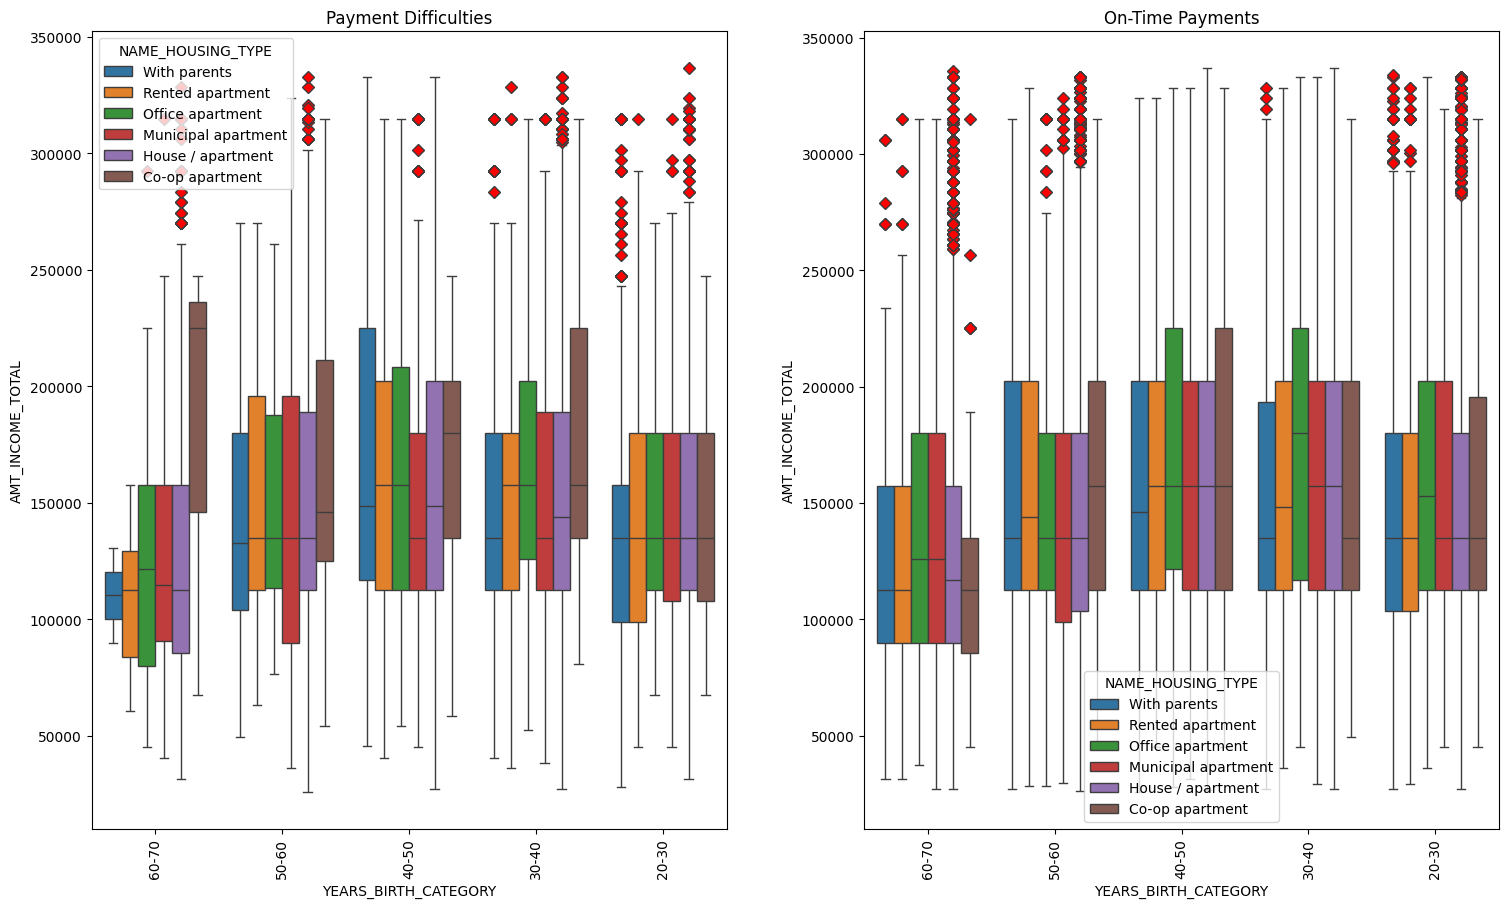

In [252]:
numeric_vs_categorical_analysis(df0, df1,'AMT_INCOME_TOTAL','YEARS_BIRTH_CATEGORY','NAME_HOUSING_TYPE')


1. Люди категорії 60-70 років з більшим доходом та проживанням у coop appartment мають проблеми з погашенням, порівняно з такими ж людьми в кого дохід менший.
2.

## Категоріальні та категоріальні змінні

### Аналіз стовпців `NAME_INCOME_TYPE` vs `CODE_GENDER`

In [ ]:
def bi_countplot_target(df0, df1, column, hue_column) :
    group_name = f'Нормалізований розподіл значень за категорією: {column}'
    print (group_name.upper())

    pltname = 'Клієнт зі складнощями щодо платності'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)

    proportions = df1.groupby(hue_column)[column].value_counts(normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[0], title=pltname)

    # анотація значень в барплоті
    for container in ax.containers:
      ax. bar_label(container, fmt='{:,.1f}%')

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()

    proportions = df0.groupby(hue_column)[column].value_counts (normalize=True)
    proportions = (proportions*100).round(2)
    ax = proportions.unstack(hue_column).sort_values(
    by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax.containers:
      ax.bar_label(container, fmt='{:,.1f}%')

    plt.show()

    #------------
    group_name = f'Кількість значень за категорією {column}'
    print(group_name.upper())

    pltname = 'Клієнт зі своєчасними платежами'
    unique_hue_values = df1[hue_column].unique()
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(14,4)
    counts = df1.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values(
      by=unique_hue_values [0], ascending=False
      ).plot.bar(ax=axes [0], title=pltname )

    for container in ax.containers:
      ax.bar_label(container)

    pltname = 'Клієнти зі своєчасними платежами'
    unique_hue_values = df0[hue_column].unique()
    counts = df0.groupby(hue_column)[column].value_counts()
    ax = counts.unstack(hue_column).sort_values (
      by=unique_hue_values[0], ascending=False
      ).plot.bar(ax=axes[1], title=pltname)

    for container in ax. containers:
      ax.bar_label(container)

    plt.show()

КЛІЄНТ ЗІ СКЛАДНОЩАМИ ЩОДО ПЛАТНОСТІ


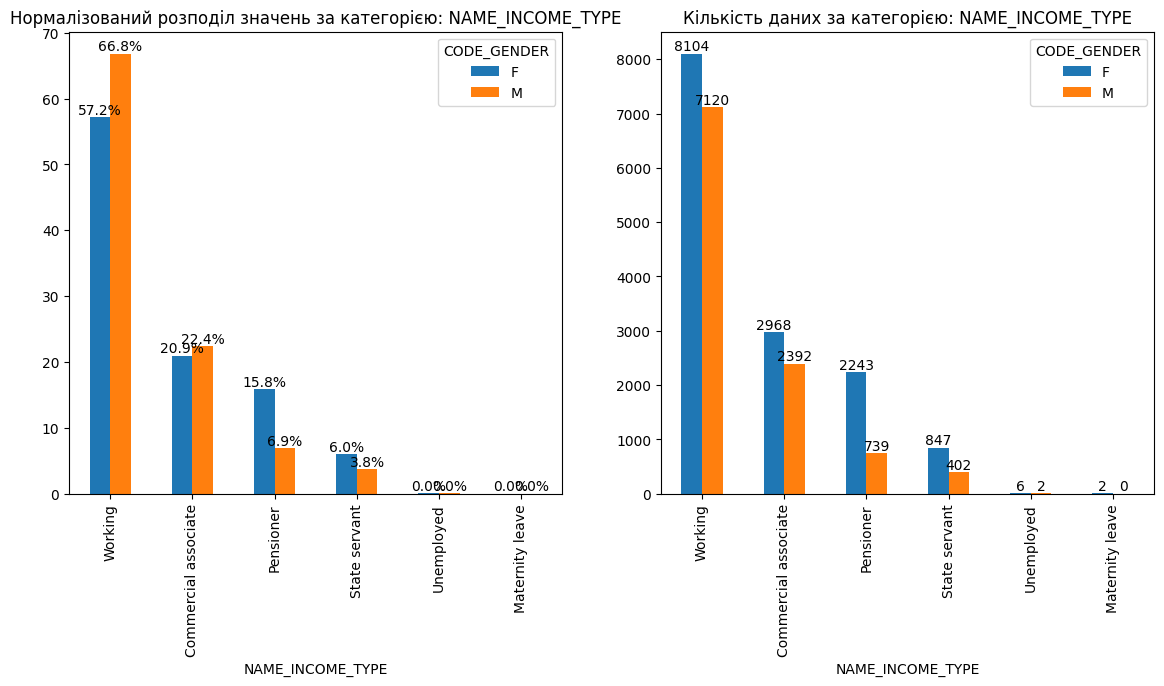

КЛІЄНТИ ЗІ СВОЄЧАСНИМИ ПЛАТЕЖАМИ


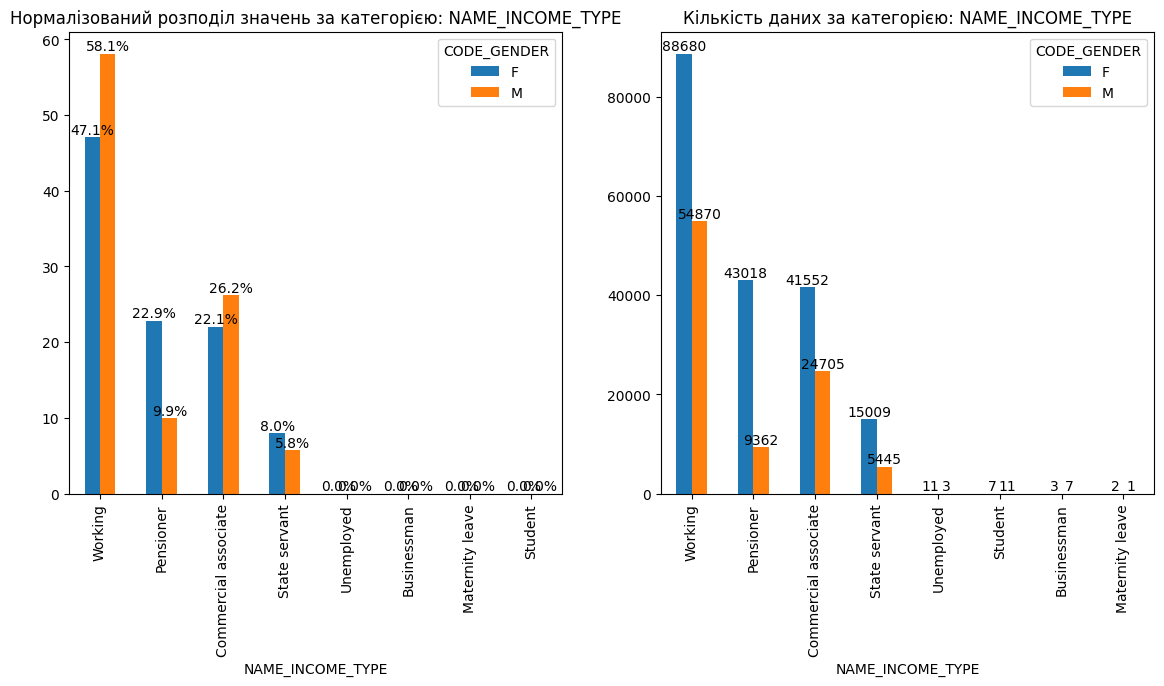

In [250]:
bi_countplot_target(df0, df1, 'NAME_INCOME_TYPE','CODE_GENDER')

**Спостереження**
- Клієнти категорії `Working` та `Male` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Pensioner` та `Female` мають більше труднощів з оплатою порівняно з тими, хто платить вчасно
- Клієнти категорії `Businessman` та `Student` здійснюють платежі вчасно, хоча їхня історія невелика

# ДЗ 8. Аналіз взаємозалежностей між двома категоріальними змінними

Проведіть подібний до прикладу аналіз залежностей між категоріальними змінними для пар змінних

- NAME_EDUCATION_TYPE vs CODE_GENDER

Опціонально:
- NAME_FAMILY_STATUS vs OCCUPATION_TYPE
- OCCUPATION_TYPE vs NAME_CONTRACT_TYPE

Опишіть спостереження щодо того, чи є цікаві знахідки стосовно цільової змінної з цього аналізу.

***
# ДЗ 9. Висновок з проведеного аналізу
Напишіть Ваш висновок з проведеного ананлізу, яким категоріям осіб Ви б видали кредит? Категорія може бути, наприклад, люди з такою-то освітою, з таким-то доходом, з таким-то досвідом роботи.

# Висновок: Категорії клієнтів, на яких слід орієнтуватися при наданні кредиту
